# Subsimulation: intra-crystal breakage generalization

**How to deal with formed residue? --> Also use function for this? --> So, include in subsimulation process**  

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import curve_fit

In [2]:
from sedgen import sedgen
from sedgen import weathering
from sedgen import preprocessing

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time 
# before executing the Python code typed.
%autoreload 2

____

In [5]:
sedgen_CA_NS = preprocessing.load_obj("sedgen_CA_NS_init")

In [6]:
sedgen_CA_NS_weathered = weathering.Weathering(sedgen_CA_NS, 10, enable_multi_pcg_breakage=True)

In [ ]:
pcg = [np.array([0, 1, 2])]
csize = [np.array([200, 500, 400])]
prob = [np.array([0.5, 0.5])]

In [12]:
def add_prob(a):
    """Add probability for no pcg breakage to interface probability
    array based on number of crystals present in pcg."""
    a_new = np.zeros(a.size+1, dtype=a.dtype)
    a_new[:-1] = a / ((a.size + 1) / a.size)
    a_new[-1] = 1 / (a.size + 1)
    return a_new

In [14]:
add_prob(np.array([0.5, 0.25, 0.25]))

array([0.375 , 0.1875, 0.1875, 0.25  ])

In [16]:
np.array([0.5, 0.5, 0.5]) / (3 / 2)

array([0.33333333, 0.33333333, 0.33333333])

In [25]:
%time sedgen_CA_NS_weathered_after = sedgen_CA_NS_weathered.weathering(operations=['intra_cb', 'inter_cb'])

2.853946952908658e-08
[      0       1       2 ... 8541911 8541912 8541913] 6601290
After 0 steps all pcg have been broken down to mcg
Wall time: 665 ms


In [34]:
sedgen_CA_NS_weathered.pcgs_new[0].size
sedgen_CA_NS_weathered.crystal_size_array_new[0].size
sedgen_CA_NS_weathered.interface_constant_prob_new[0].size

8541915

8541915

8541914

____

In [10]:
sedgen_CA_NS.size_bins_medians[1:] - sedgen_CA_NS.size_bins_medians[:-1]

array([6.81615224e-06, 6.86356233e-06, 6.91130218e-06, ...,
       2.17244113e-01, 2.18755166e-01, 2.20276728e-01])

In [13]:
diffs = sedgen_CA_NS.size_bins[1:] - sedgen_CA_NS.size_bins[:-1]

In [33]:
diffs

array([6.79252935e-06, 6.83977513e-06, 6.88734953e-06, ...,
       2.17997021e-01, 2.19513310e-01, 2.21040146e-01])

In [39]:
sedgen_CA_NS.ratio_search_bins

array([8.24767027e-28, 8.42097135e-28, 8.59791386e-28, ...,
       9.59264119e-01, 9.79420298e-01, 1.00000000e+00])

In [114]:
ratios_init = (sedgen_CA_NS.size_bins_medians) / (sedgen_CA_NS.size_bins_medians[-1])

In [57]:
ratios_t1 = (sedgen_CA_NS.size_bins_medians - 0.01) / (sedgen_CA_NS.size_bins_medians[-1] - 0.01)

In [58]:
ratios_init[300:350]
ratios_t1[300:350]

array([0.00024584, 0.00024755, 0.00024927, 0.000251  , 0.00025275,
       0.00025451, 0.00025628, 0.00025806, 0.00025986, 0.00026166,
       0.00026348, 0.00026532, 0.00026716, 0.00026902, 0.00027089,
       0.00027278, 0.00027467, 0.00027658, 0.00027851, 0.00028044,
       0.00028239, 0.00028436, 0.00028634, 0.00028833, 0.00029033,
       0.00029235, 0.00029439, 0.00029643, 0.0002985 , 0.00030057,
       0.00030266, 0.00030477, 0.00030689, 0.00030902, 0.00031117,
       0.00031334, 0.00031552, 0.00031771, 0.00031992, 0.00032215,
       0.00032439, 0.00032664, 0.00032891, 0.0003312 , 0.00033351,
       0.00033583, 0.00033816, 0.00034051, 0.00034288, 0.00034527])

array([-6.77655309e-05, -6.60550508e-05, -6.43326733e-05, -6.25983157e-05,
       -6.08518947e-05, -5.90933264e-05, -5.73225263e-05, -5.55394093e-05,
       -5.37438897e-05, -5.19358813e-05, -5.01152973e-05, -4.82820500e-05,
       -4.64360515e-05, -4.45772131e-05, -4.27054454e-05, -4.08206586e-05,
       -3.89227620e-05, -3.70116646e-05, -3.50872743e-05, -3.31494989e-05,
       -3.11982452e-05, -2.92334195e-05, -2.72549273e-05, -2.52626736e-05,
       -2.32565627e-05, -2.12364982e-05, -1.92023830e-05, -1.71541194e-05,
       -1.50916091e-05, -1.30147528e-05, -1.09234509e-05, -8.81760277e-06,
       -6.69710734e-06, -4.56186271e-06, -2.41176627e-06, -2.46714727e-07,
        1.93339594e-06,  4.12867047e-06,  6.33921435e-06,  8.56513378e-06,
        1.08065357e-05,  1.30635278e-05,  1.53362185e-05,  1.76247171e-05,
        1.99291334e-05,  2.22495782e-05,  2.45861629e-05,  2.69389999e-05,
        2.93082022e-05,  3.16938835e-05])

In [59]:
ratios_init[0:50]

array([3.07298447e-05, 3.09435876e-05, 3.11588173e-05, 3.13755440e-05,
       3.15937782e-05, 3.18135303e-05, 3.20348109e-05, 3.22576306e-05,
       3.24820002e-05, 3.27079304e-05, 3.29354320e-05, 3.31645161e-05,
       3.33951935e-05, 3.36274755e-05, 3.38613730e-05, 3.40968975e-05,
       3.43340602e-05, 3.45728725e-05, 3.48133458e-05, 3.50554918e-05,
       3.52993220e-05, 3.55448482e-05, 3.57920822e-05, 3.60410358e-05,
       3.62917210e-05, 3.65441499e-05, 3.67983346e-05, 3.70542872e-05,
       3.73120202e-05, 3.75715458e-05, 3.78328766e-05, 3.80960251e-05,
       3.83610039e-05, 3.86278257e-05, 3.88965035e-05, 3.91670501e-05,
       3.94394785e-05, 3.97138017e-05, 3.99900331e-05, 4.02681858e-05,
       4.05482731e-05, 4.08303087e-05, 4.11143059e-05, 4.14002785e-05,
       4.16882403e-05, 4.19782049e-05, 4.22701864e-05, 4.25641988e-05,
       4.28602562e-05, 4.31583729e-05])

In [39]:
x1 = np.array([1, 2, 4, 8, 16, 32], dtype=np.float64)
x2 = x1 - 0.25
x3 = x2 - 0.25

In [40]:
x1_volume = sedgen.calculate_volume_sphere(x1)
x2_volume = sedgen.calculate_volume_sphere(x2)
x3_volume = sedgen.calculate_volume_sphere(x3)

In [67]:
(32*100*1500*6) / (1024**2)

27.4658203125

In [69]:
(10e6*8) / 1024**2

76.2939453125

In [70]:
(100*1500*16) / 1024**2

2.288818359375

In [43]:
x1_volume
x2_volume

array([5.23598776e-01, 4.18879020e+00, 3.35103216e+01, 2.68082573e+02,
       2.14466058e+03, 1.71572847e+04])

array([2.20893233e-01, 2.80616219e+00, 2.76116542e+01, 2.43727049e+02,
       2.04569224e+03, 1.67582942e+04])

In [47]:
x1_volume[1] + x1_volume[2] - x1_volume[3]
x2_volume[1] + x2_volume[2] - x2_volume[3]

-230.3834612632515

-213.30923244022568

In [41]:
x1_volume / x2_volume
x2_volume / x3_volume

array([2.37037037, 1.49271137, 1.21362963, 1.09992951, 1.0483789 ,
       1.02380854])

array([3.375     , 1.58796296, 1.22995627, 1.10337037, 1.04917173,
       1.02399899])

In [50]:
x1_volume - x2_volume
x2_volume - x3_volume

array([3.02705542e-01, 1.38262802e+00, 5.89866746e+00, 2.43555243e+01,
       9.89683498e+01, 3.98990448e+02])

array([1.55443387e-01, 1.03901632e+00, 5.16235668e+00, 2.28338154e+01,
       9.58758446e+01, 3.92756350e+02])

In [53]:
eq_diam_12 = sedgen.calculate_equivalent_circular_diameter(x1_volume - x2_volume)
eq_diam_23 = sedgen.calculate_equivalent_circular_diameter(x2_volume - x3_volume)

In [55]:
eq_diam_12 / eq_diam_12[-1]
eq_diam_23 / eq_diam_23[-1]

array([0.09120514, 0.15132626, 0.2454316 , 0.39374193, 0.62831575,
       1.        ])

array([0.07342033, 0.13830346, 0.23599797, 0.38739299, 0.62497407,
       1.        ])

In [42]:
x1_volume / x1_volume[-1]
x2_volume / x2_volume[-1]
x3_volume / x3_volume[-1]

array([3.05175781e-05, 2.44140625e-04, 1.95312500e-03, 1.56250000e-02,
       1.25000000e-01, 1.00000000e+00])

array([1.31811287e-05, 1.67449154e-04, 1.64764109e-03, 1.45436669e-02,
       1.22070433e-01, 1.00000000e+00])

array([3.99924814e-06, 1.07979700e-04, 1.37174211e-03, 1.34974625e-02,
       1.19141601e-01, 1.00000000e+00])

In [26]:
x1_ratio = x1 / x1[-1]
x1_ratio
x2_ratio = x2 / x2[-1]
x2_ratio
x3_ratio = x3 / x3[-1]
x3_ratio

array([0.03125, 0.0625 , 0.125  , 0.25   , 0.5    , 1.     ])

array([-0.06896552, -0.03448276,  0.03448276,  0.17241379,  0.44827586,
        1.        ])

array([-0.19230769, -0.15384615, -0.07692308,  0.07692308,  0.38461538,
        1.        ])

In [29]:
x1[:-1] - x1[1:]
x2[:-1] - x2[1:]

array([ -1,  -2,  -4,  -8, -16])

array([ -1,  -2,  -4,  -8, -16])

In [10]:
ratios_diff_12 = x1_ratio - x2_ratio
ratios_diff_23 = x2_ratio - x3_ratio
ratios_diff_12
ratios_diff_23

array([0.10021552, 0.09698276, 0.09051724, 0.07758621, 0.05172414,
       0.        ])

array([0.12334218, 0.1193634 , 0.11140584, 0.09549072, 0.06366048,
       0.        ])

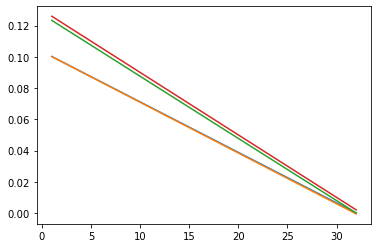

In [25]:
plt.plot(x1, ratios_diff_12)
plt.plot(x1, [-0.00325 *x + 0.1034 for x in x1])

plt.plot(x1, ratios_diff_23)
plt.plot(x1, [-0.004 *x + 0.13 for x in x1])

plt.show();

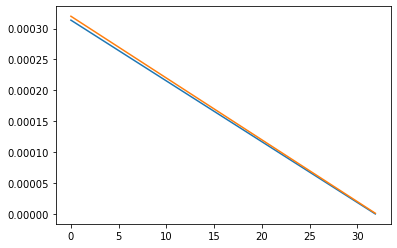

In [161]:
plt.plot(sedgen_CA_NS.size_bins_medians, ratios_init - ratios_t1)
plt.plot(sedgen_CA_NS.size_bins_medians, [-0.00001*x +0.00032 for x in sedgen_CA_NS.size_bins_medians])

In [95]:
weathering.determine_intra_cb_dict(1000, sedgen_CA_NS.ratio_search_bins)

({999: 813,
  998: 846,
  997: 865,
  996: 878,
  995: 888,
  994: 896,
  993: 903,
  992: 909,
  991: 914,
  990: 919,
  989: 923,
  988: 927,
  987: 930,
  986: 933,
  985: 936,
  984: 939,
  983: 941,
  982: 944,
  981: 946,
  980: 948,
  979: 950,
  978: 951,
  977: 953,
  976: 955,
  975: 956,
  974: 958,
  973: 959,
  972: 960,
  971: 961,
  970: 963,
  969: 964,
  968: 965,
  967: 966},
 array([186, 152, 132, 118, 107,  98,  90,  83,  77,  71,  66,  61,  57,
         53,  49,  45,  42,  38,  35,  32,  29,  27,  24,  21,  19,  16,
         14,  12,  10,   7,   5,   3,   1], dtype=int64),
 array([1.04805478e-04, 6.89476922e-05, 1.06230228e-04, 7.02562252e-04,
        1.35396493e-03, 2.27354738e-03, 2.41649589e-03, 2.52870918e-03,
        3.43950984e-03, 2.18215732e-03, 2.80307644e-03, 1.68399001e-03,
        3.61214764e-03, 4.30225182e-03, 3.70264189e-03, 1.75775482e-03,
        4.56882482e-03, 1.46453705e-04, 1.04774771e-03, 1.09496275e-03,
        2.70194088e-04, 6.13940413e-03,

In [38]:
np.sum(sedgen_CA_NS.size_bins_medians - 0.01 > 0.0)

1164

In [30]:
sedgen_CA_NS.size_bins[335]

0.009957504900931733

In [14]:
len([2.0**x for x in np.arange(-10, 5, diffs[0])])

2208309

In [31]:
len([2.0**x for x in np.arange(-10, 5, diffs[335])])

216576

In [32]:
2**16

65536

____

**Remove chemical weathering from operation as we are only interested in the effects of mechanical weathering here.**

In [8]:
sedgen_CA_NS.minerals

['Q', 'P', 'K', 'B', 'O', 'A']

In [196]:
np.sum(sedgen_CA_NS_weathered_after[-1][:, i], axis=1)

array([         0,          0,          0,          0,          0,
                0,          0,          1,          5,         13,
               62,        143,        464,        927,       2382,
             4631,       9486,      17423,      31876,      55261,
            94022,     154919,     250922,     398175,     623516,
           961882,    1469441,    2222200,    3335140,    4970798,
          7366660,   10860724,   15939244,   23297751,   33924951,
         49223267,   71176011,  102576537,  147344435,  210969500,
        301077630,  428258112,  607146576,  857891638, 1208109703],
      dtype=uint32)

C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


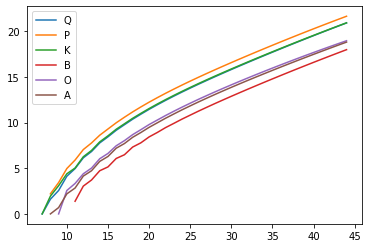

In [203]:
for i in range(6):
    plt.plot(np.log(np.sum(sedgen_CA_NS_weathered_after[-1][:, i], axis=1)), label=sedgen_CA_NS.minerals[i])
plt.legend()
plt.show();

In [209]:
sedgen_CA_NS_weathered_after[-6]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.06261518e-03, 0.00000000e+00, 8.26551286e+00, 1.57373505e-03,
       3.55440081e+01, 1.92822389e+00, 5.30840172e+02, 2.54780658e+02,
       1.40729827e+03, 2.05988040e+03, 4.08365901e+03, 6.47446770e+03,
       1.53098464e+04, 1.45019908e+04, 2.52840081e+04, 2.82685221e+04,
       3.98786295e+04, 5.48842984e+04, 7.78752418e+04, 7.33189280e+04,
       1.07241584e+05, 1.25909731e+05, 1.47191120e+05, 1.72182287e+05,
       2.06454121e+05, 2.10435756e+05, 2.51910787e+05, 2.78822815e+05,
       3.00974012e+05, 3.26276139e+05, 3.41679872e+05, 3.55865427e+05,
       3.82442214e+05, 3.91736208e+05, 4.09295052e+05, 4.09049379e+05,
       4.17046878e+05])

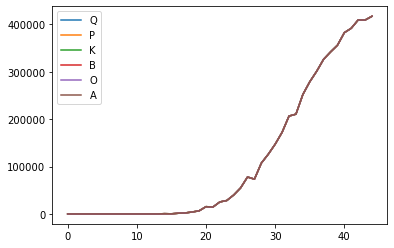

In [211]:
for i in range(6):
    plt.plot(sedgen_CA_NS_weathered_after[-6], label=sedgen_CA_NS.minerals[i])
plt.legend()
plt.show();

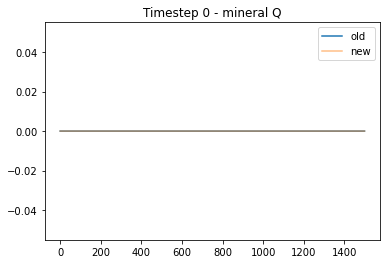

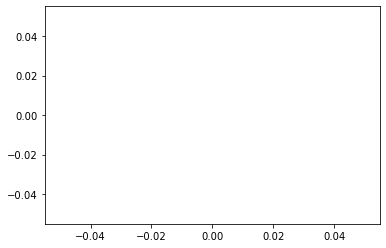

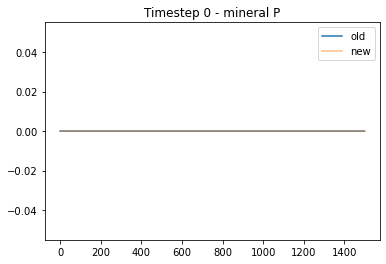

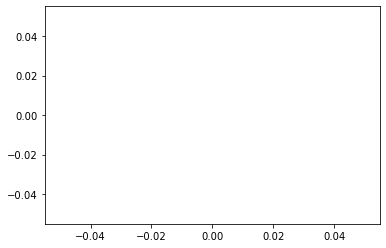

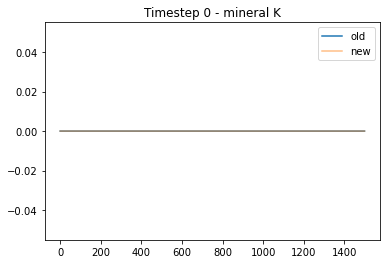

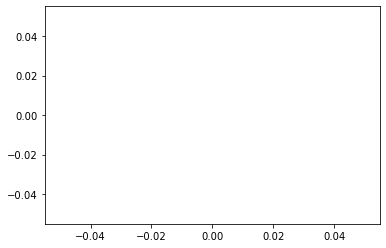

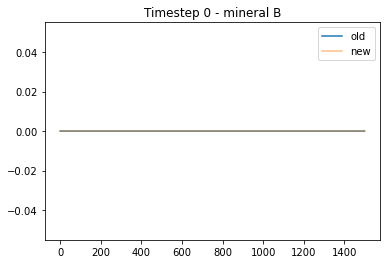

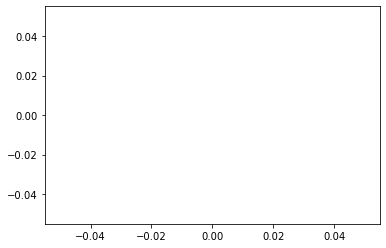

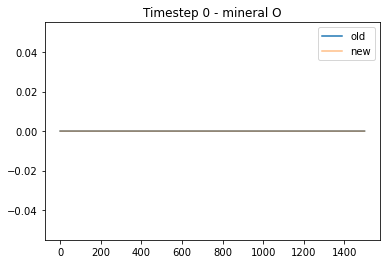

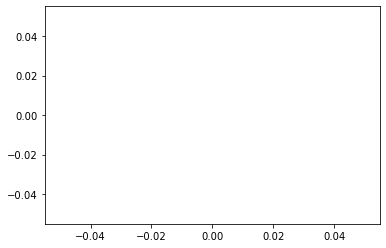

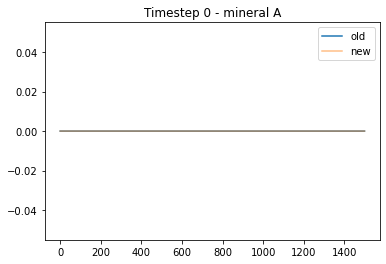

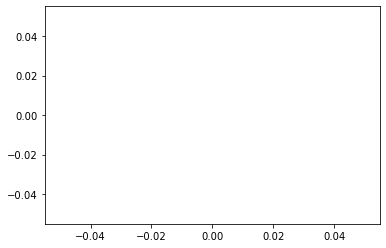

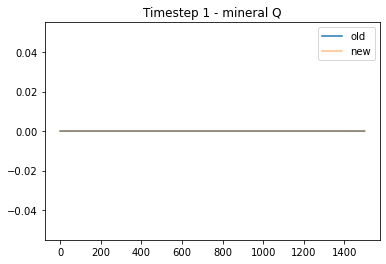

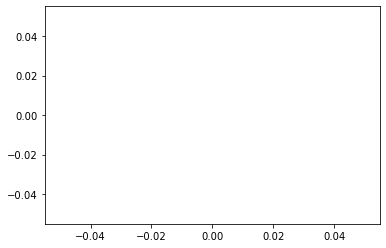

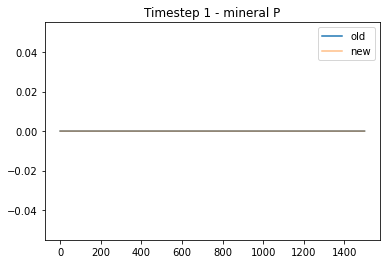

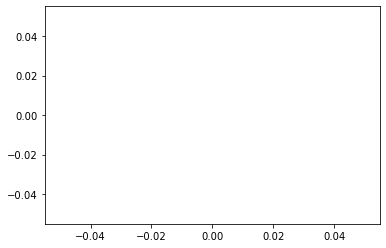

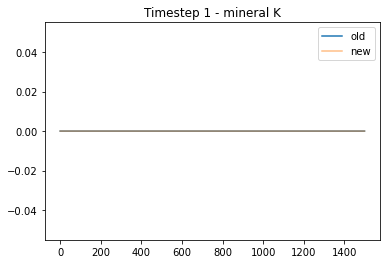

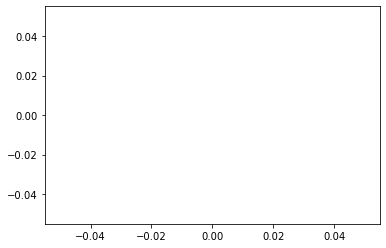

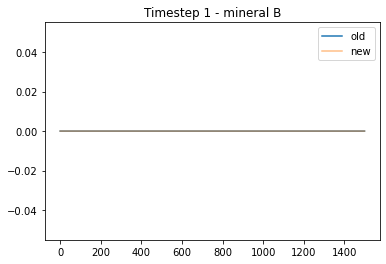

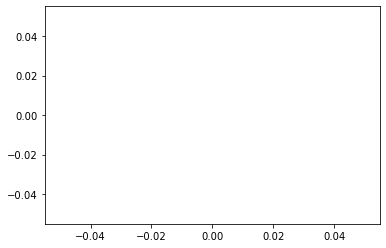

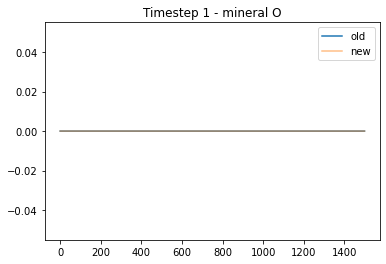

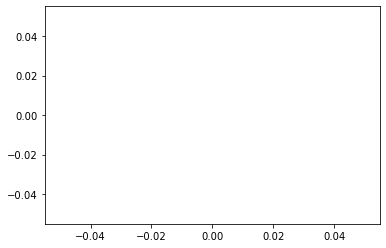

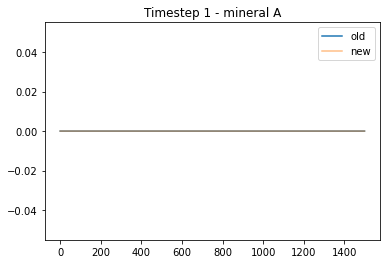

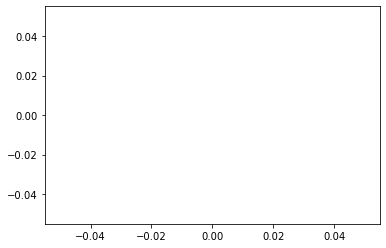

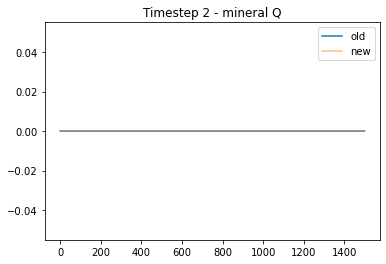

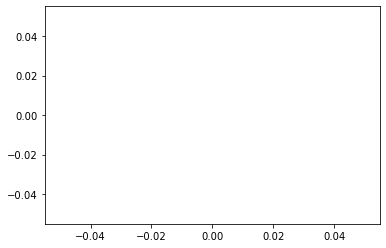

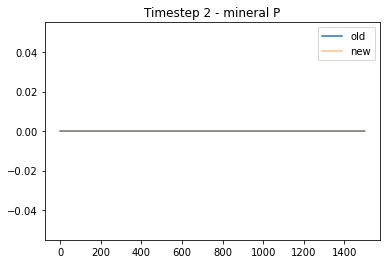

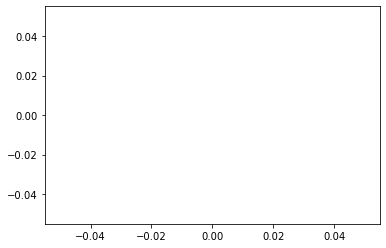

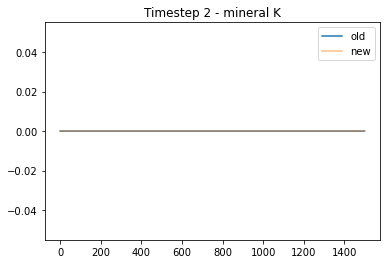

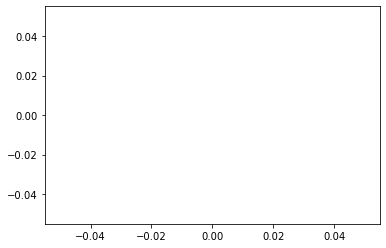

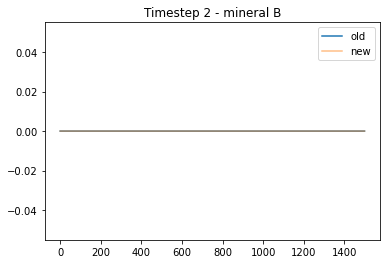

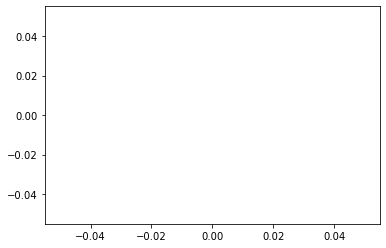

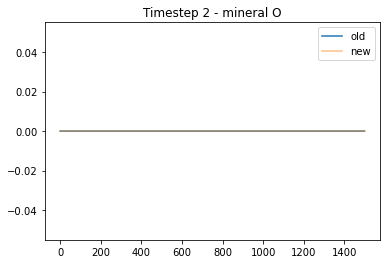

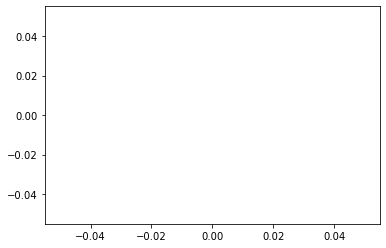

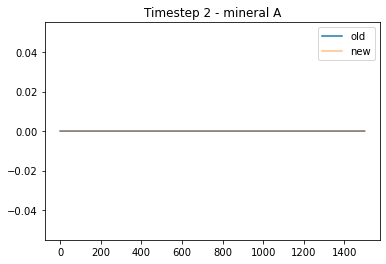

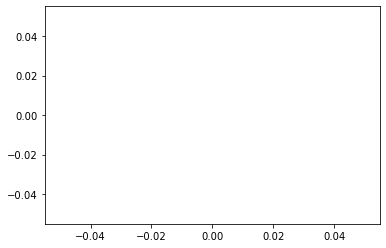

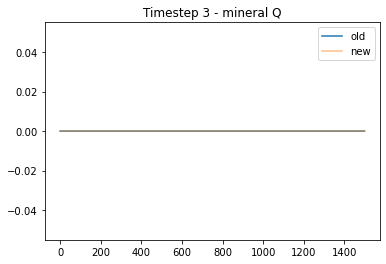

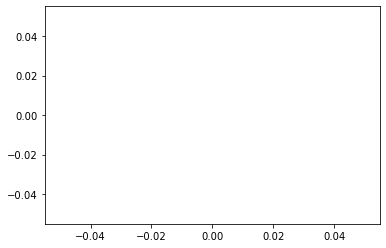

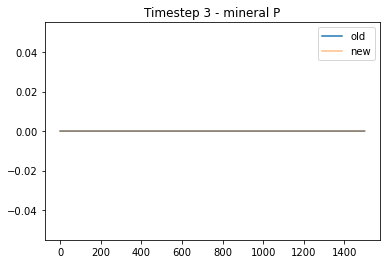

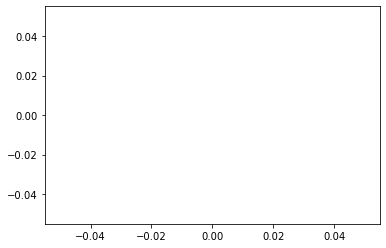

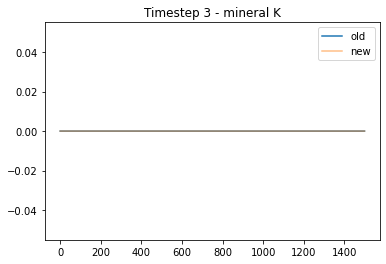

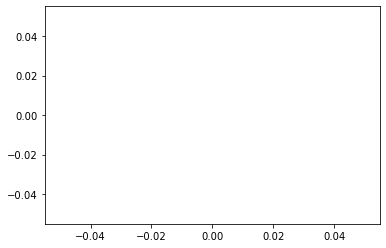

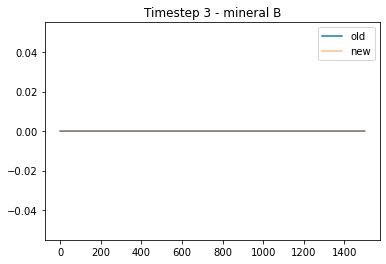

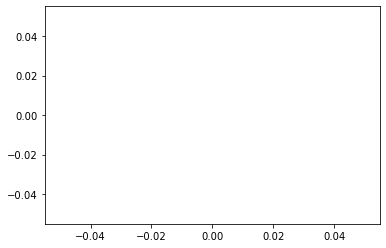

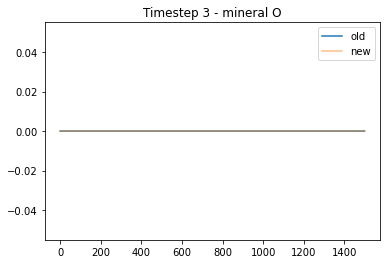

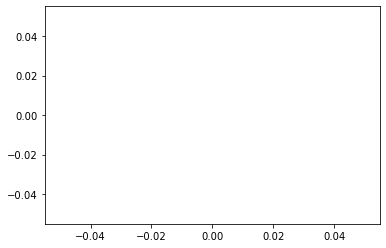

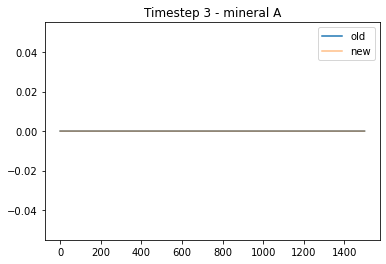

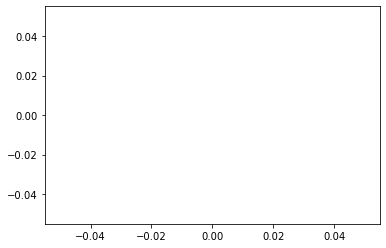

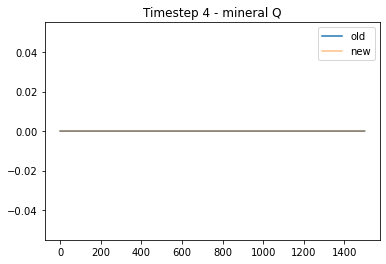

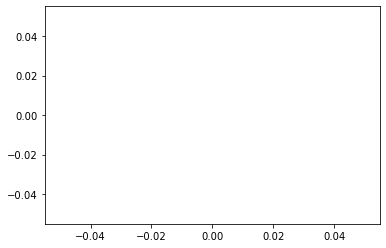

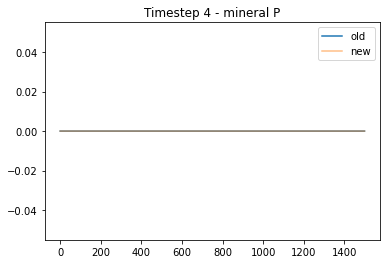

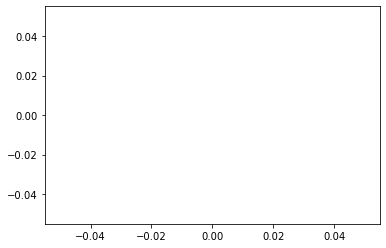

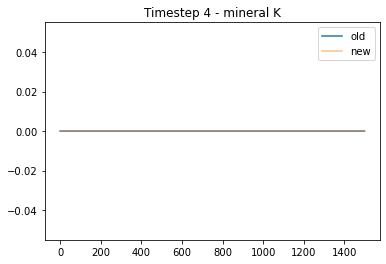

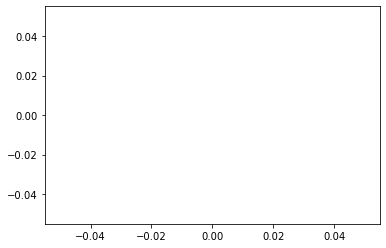

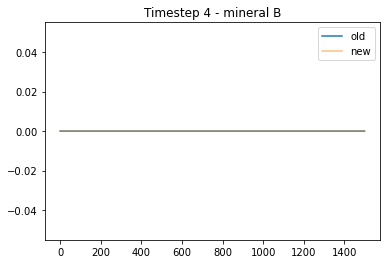

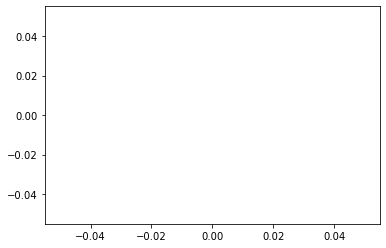

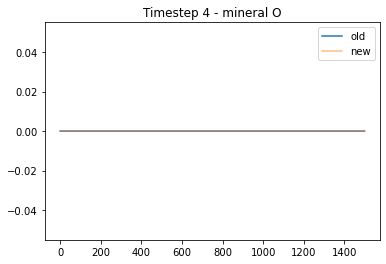

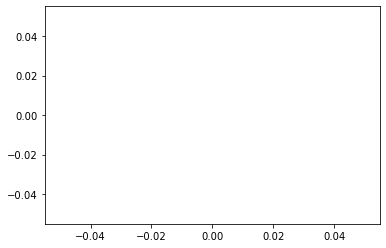

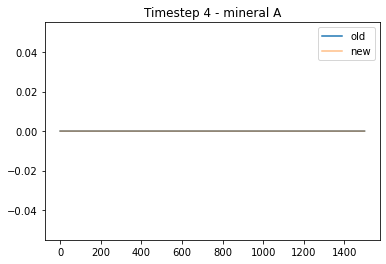

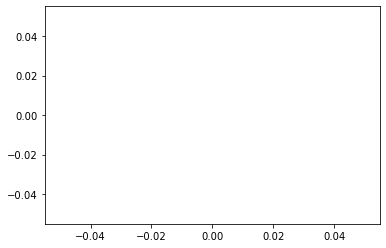

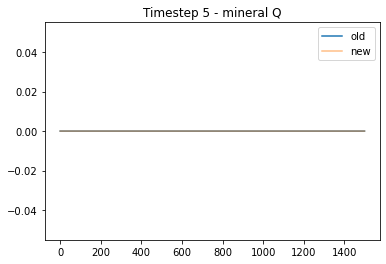

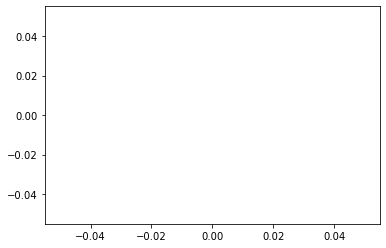

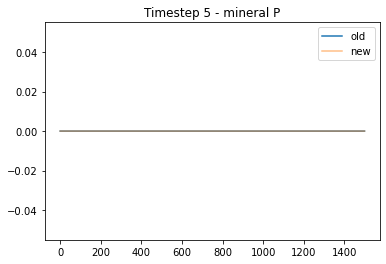

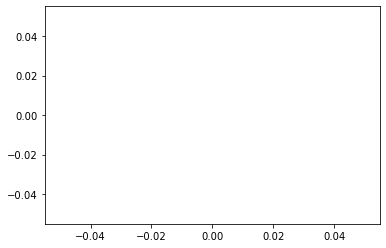

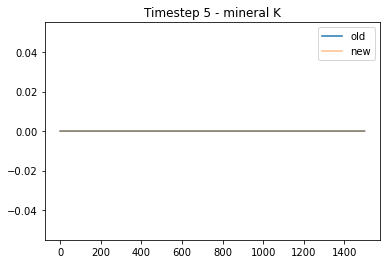

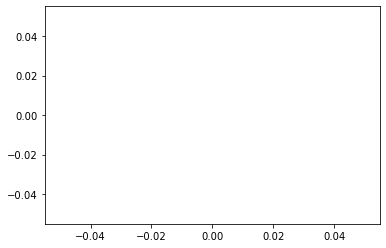

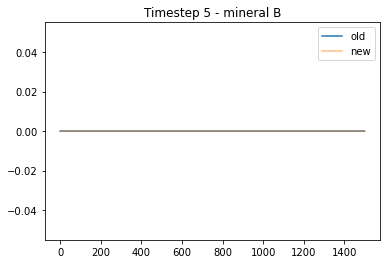

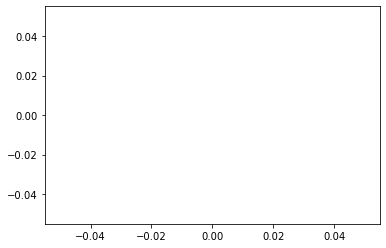

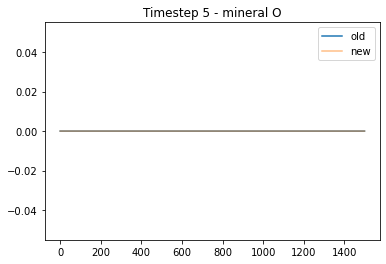

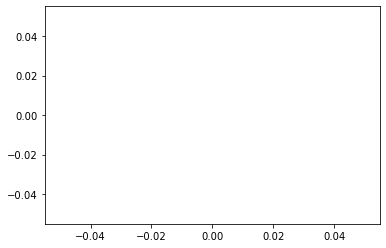

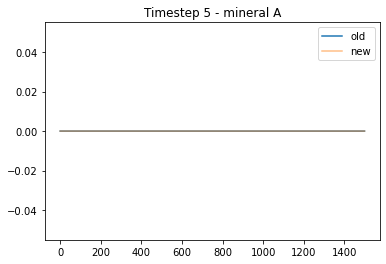

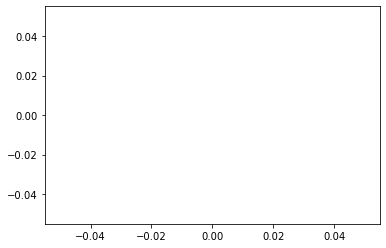

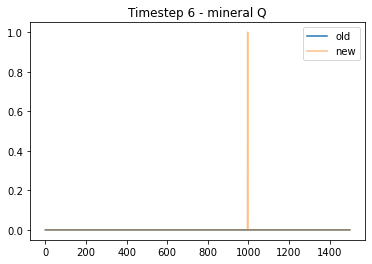

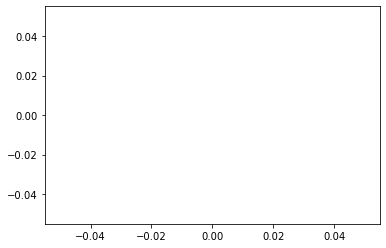

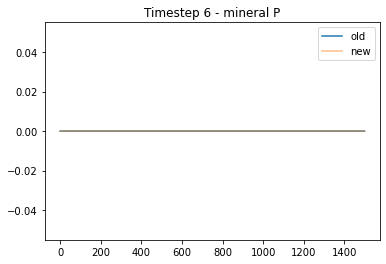

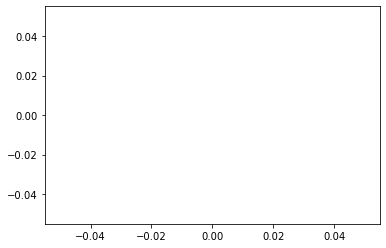

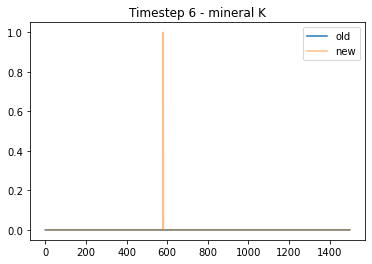

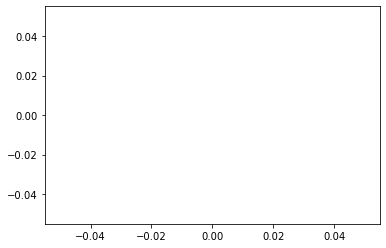

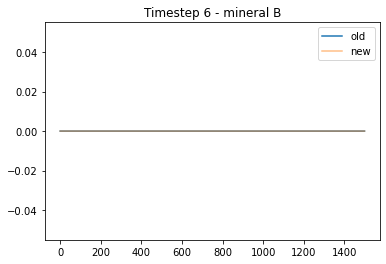

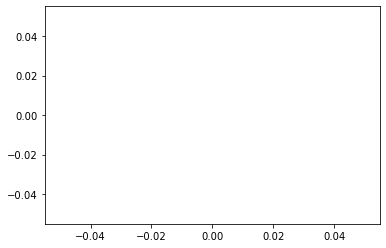

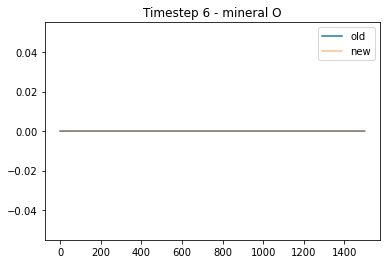

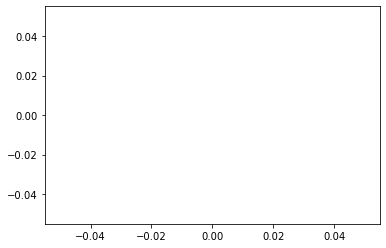

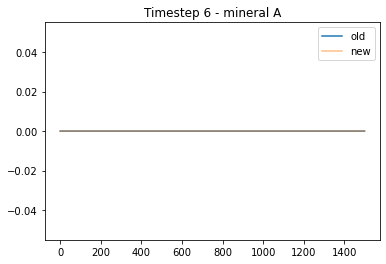

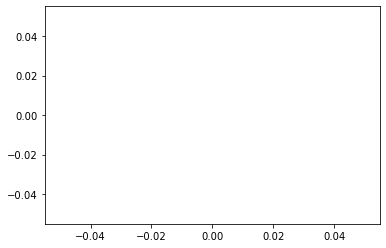

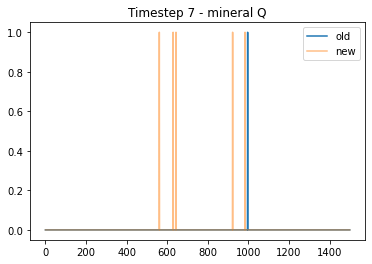

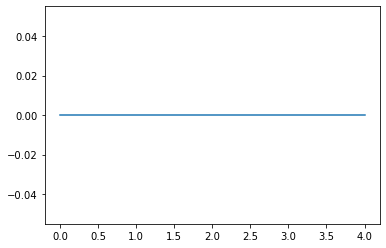

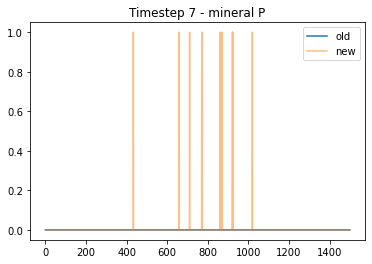

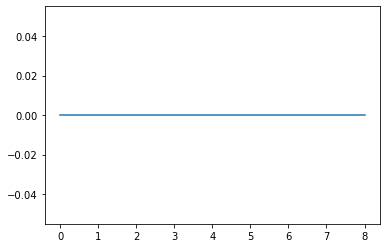

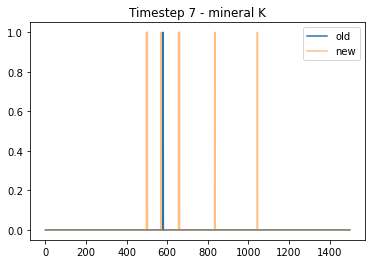

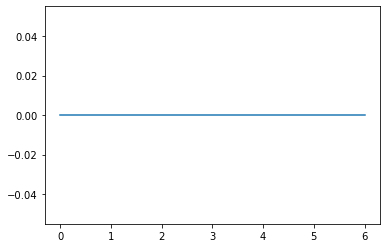

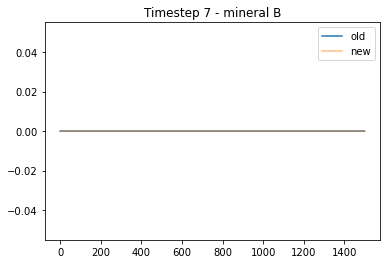

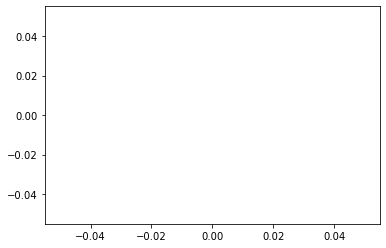

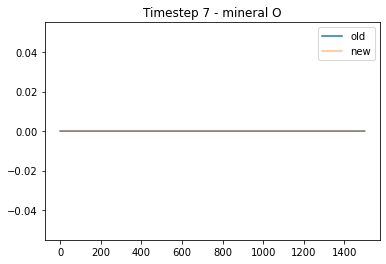

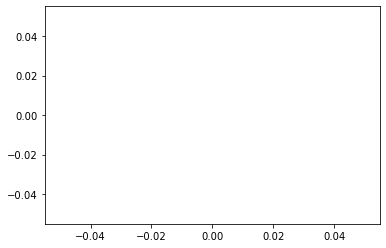

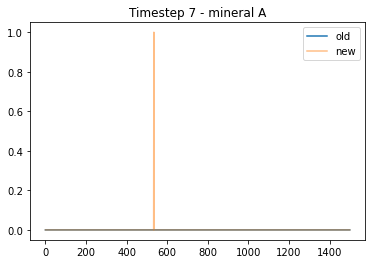

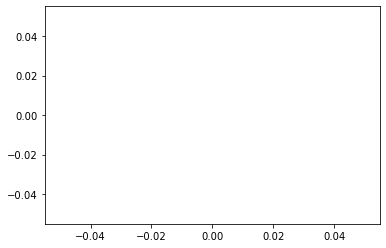

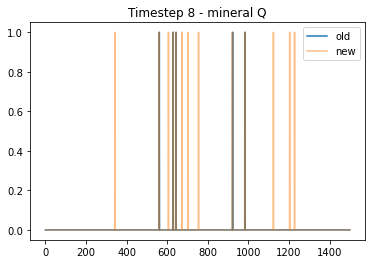

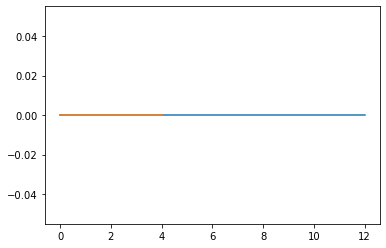

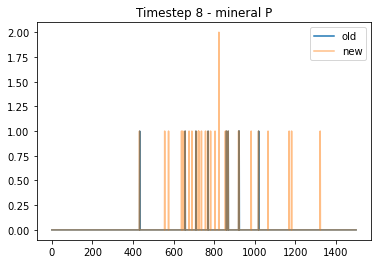

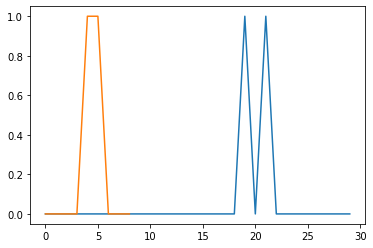

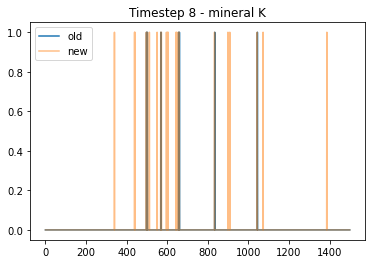

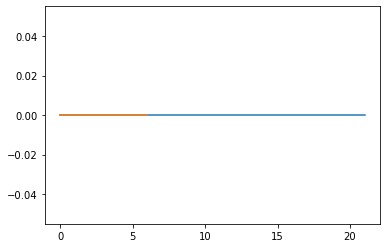

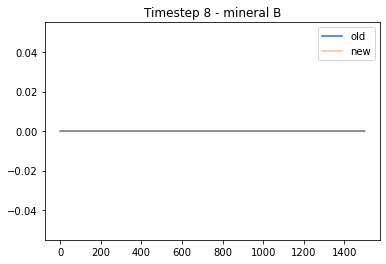

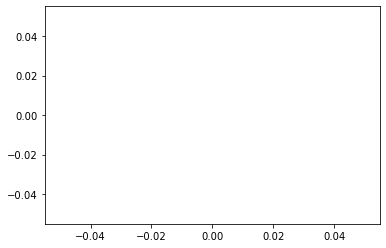

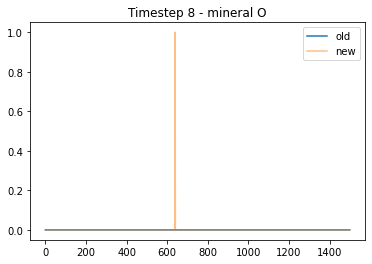

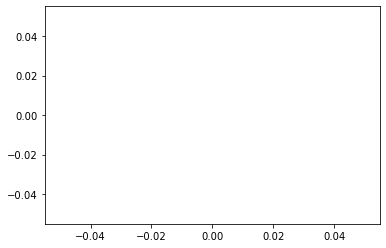

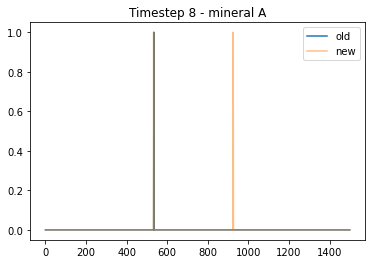

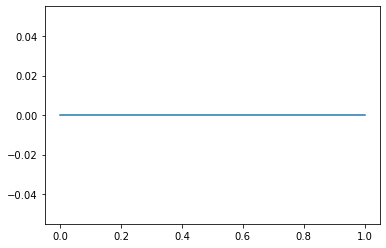

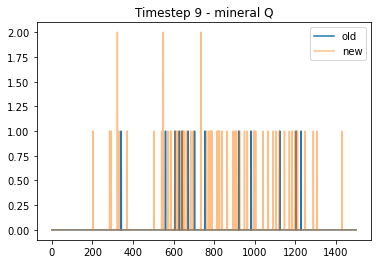

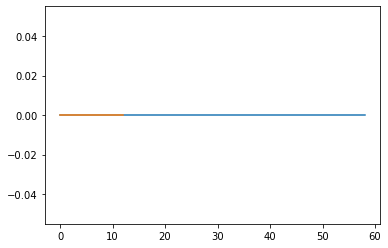

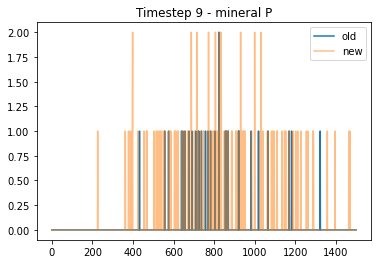

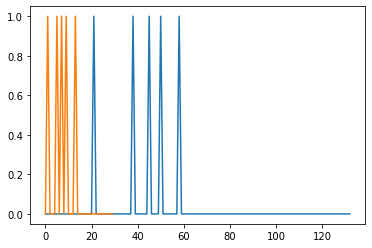

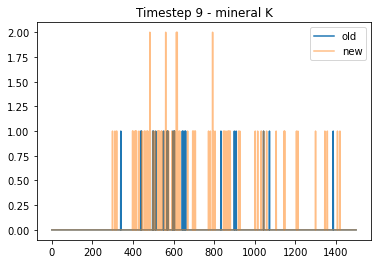

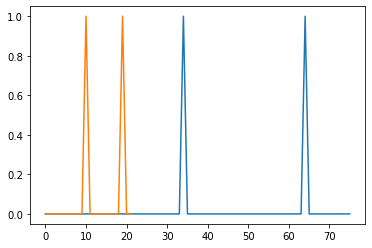

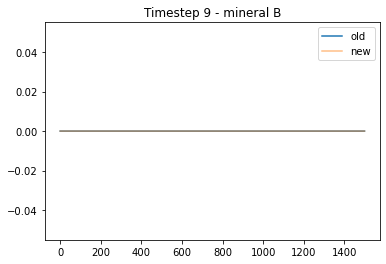

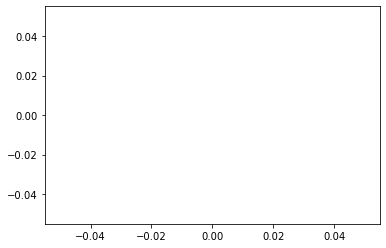

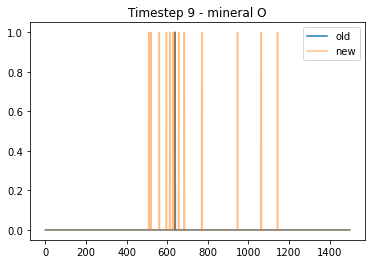

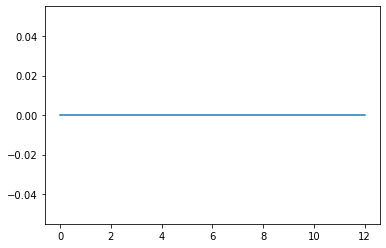

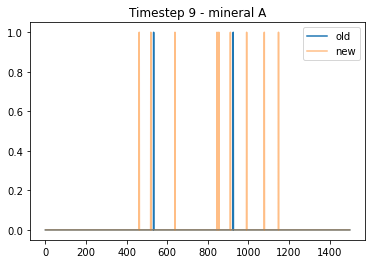

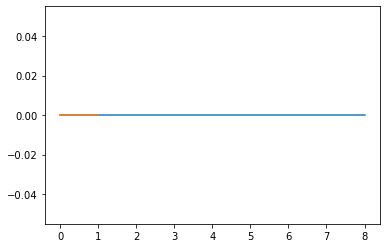

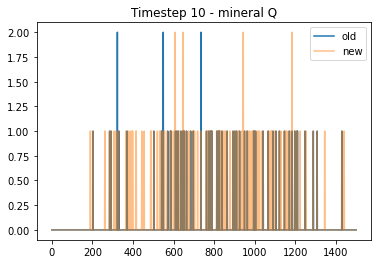

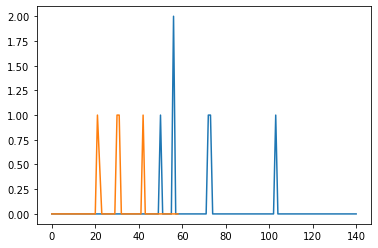

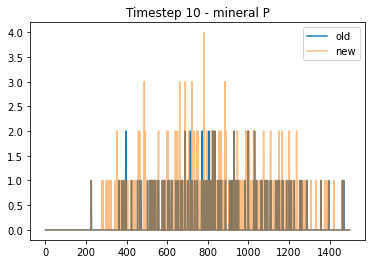

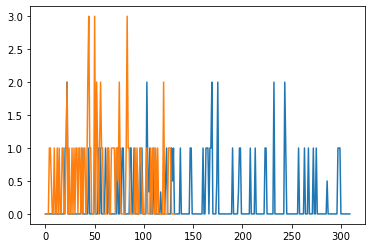

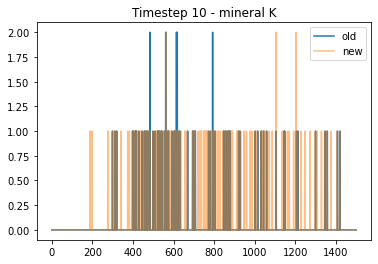

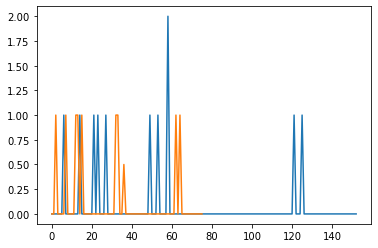

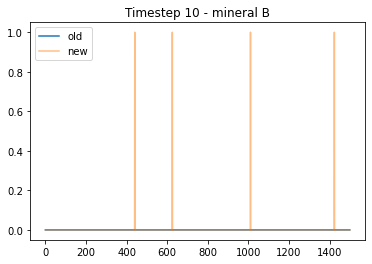

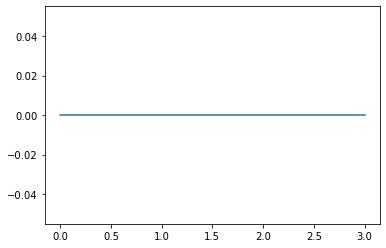

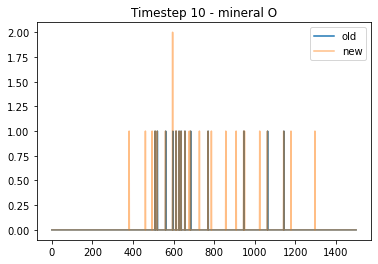

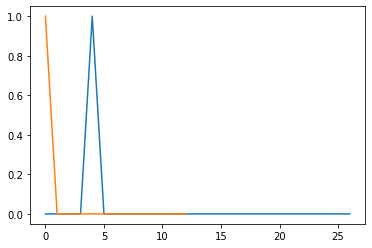

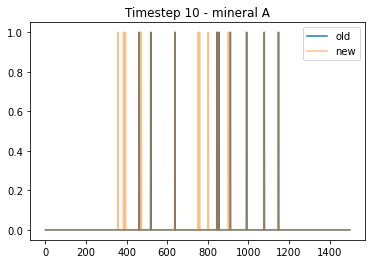

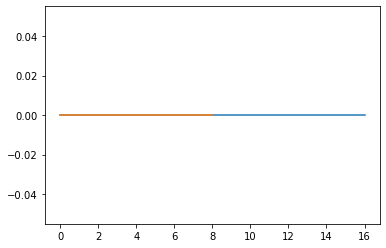

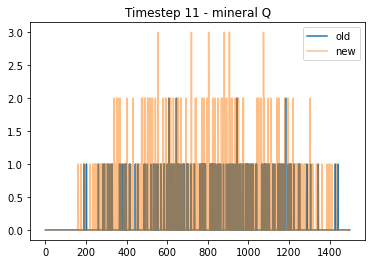

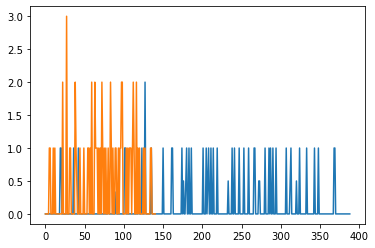

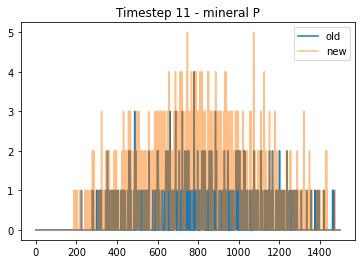

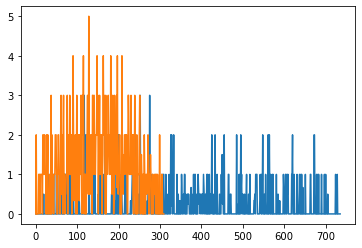

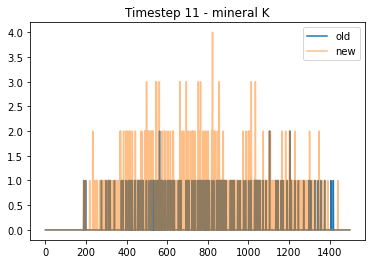

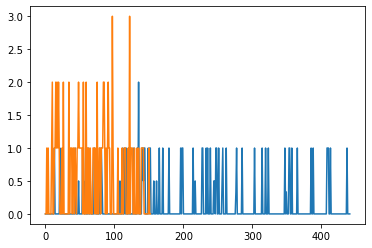

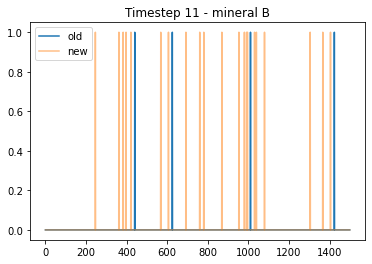

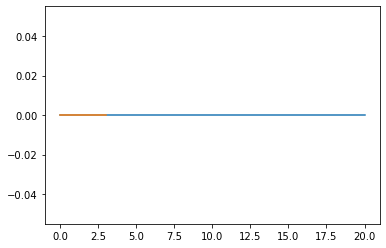

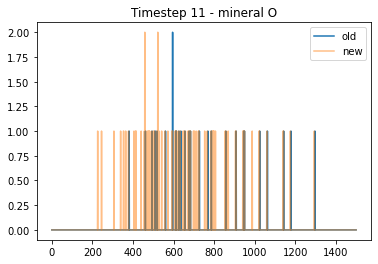

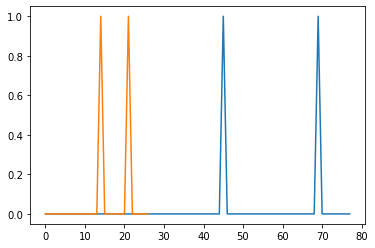

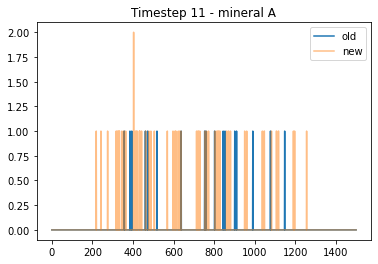

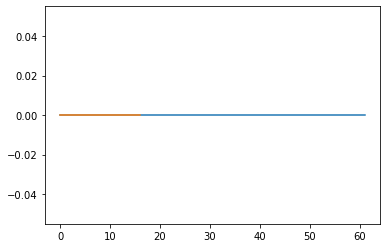

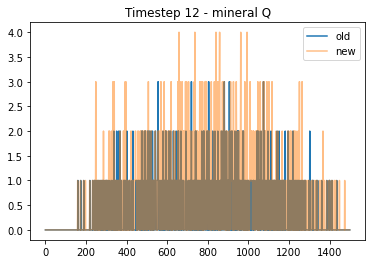

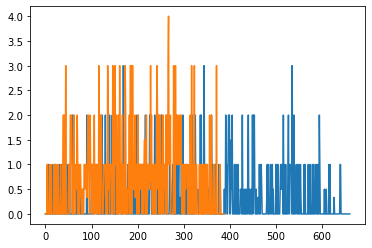

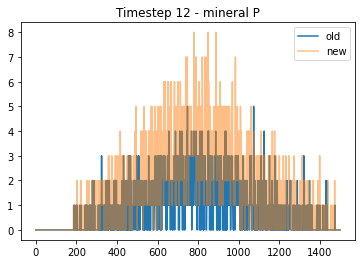

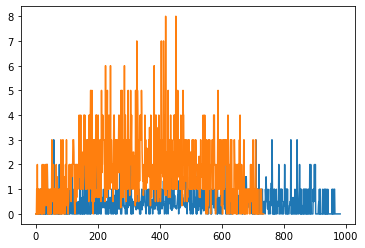

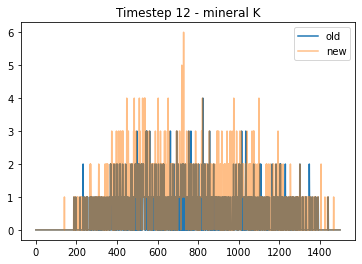

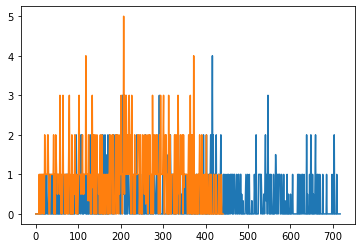

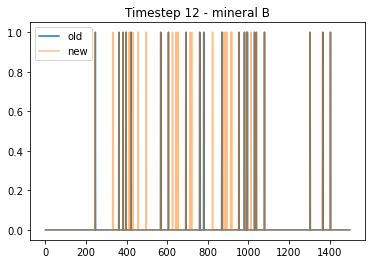

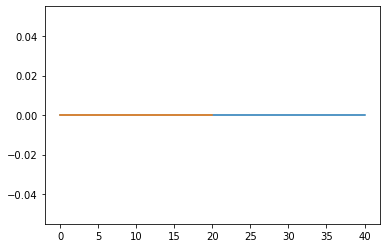

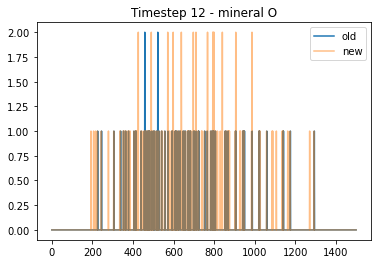

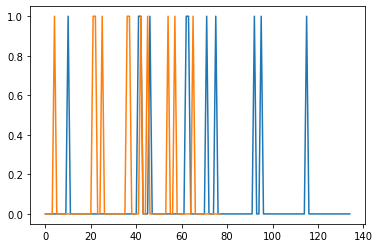

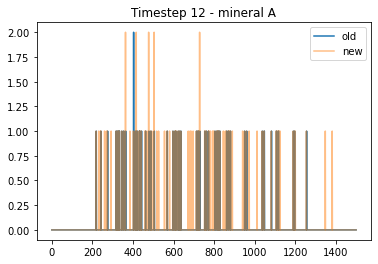

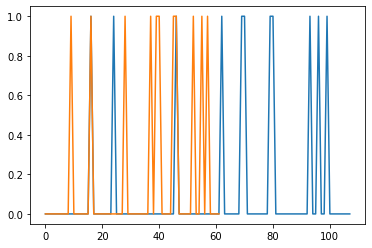

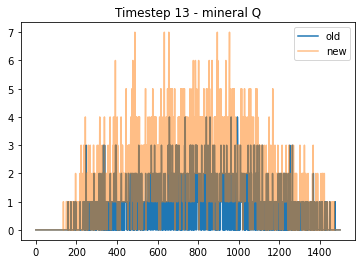

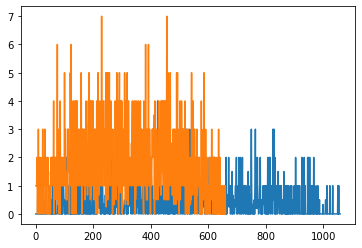

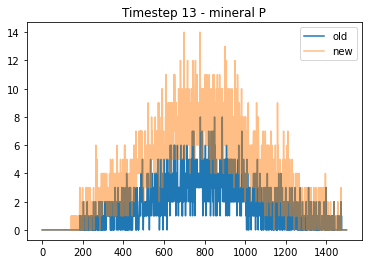

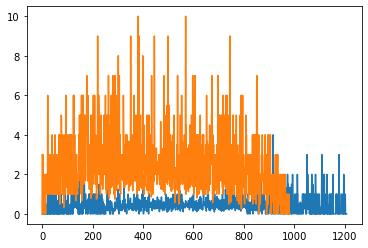

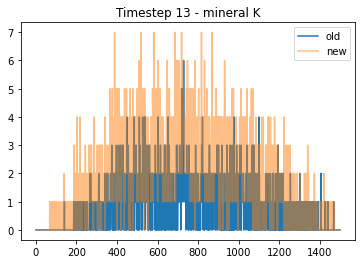

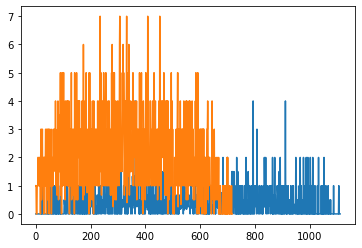

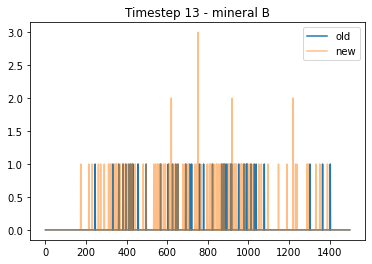

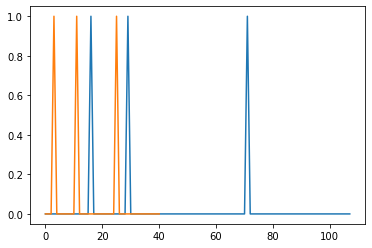

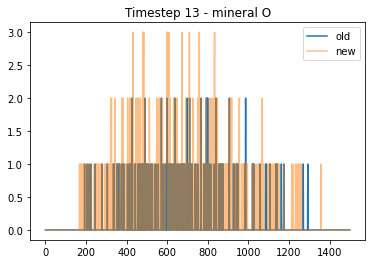

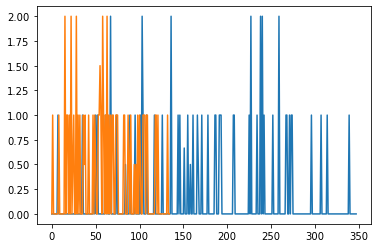

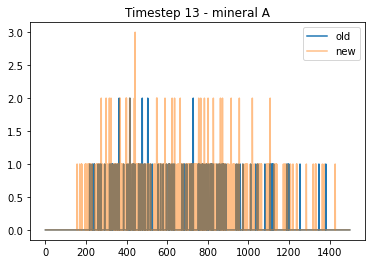

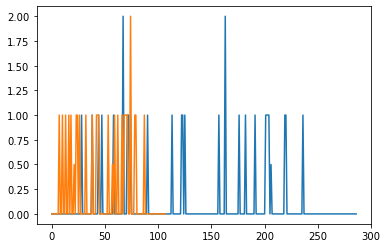

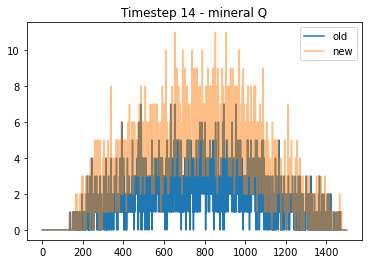

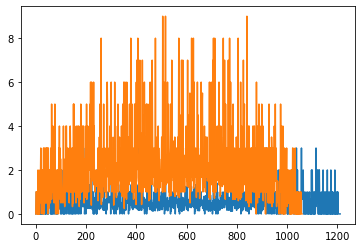

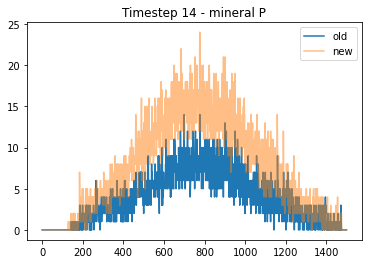

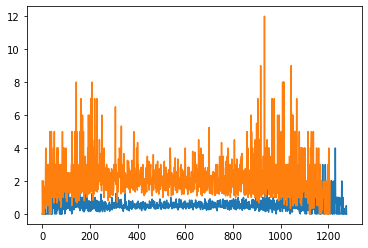

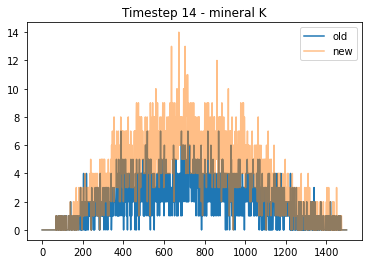

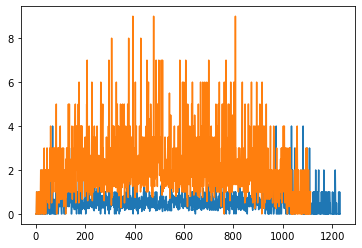

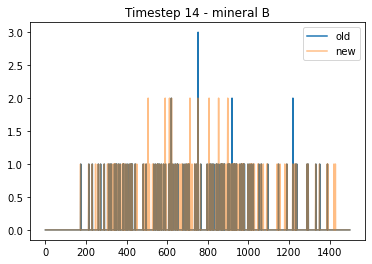

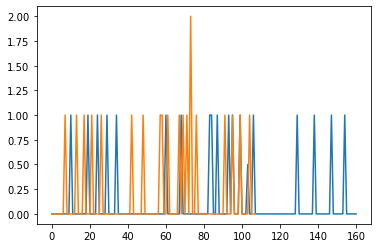

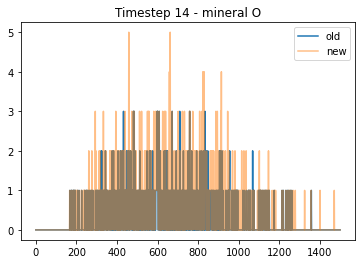

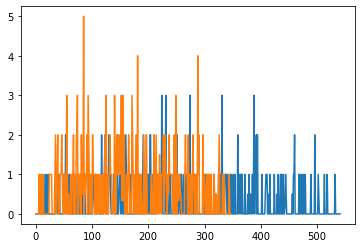

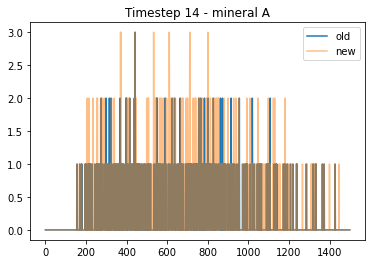

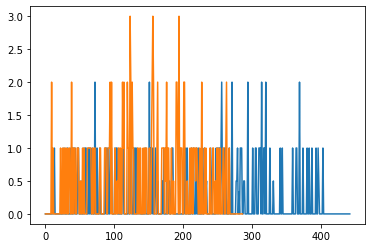

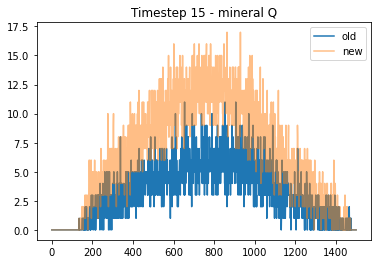

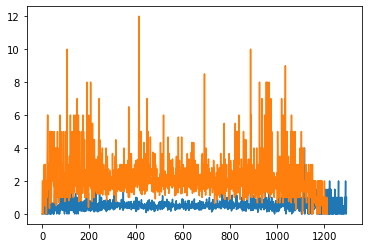

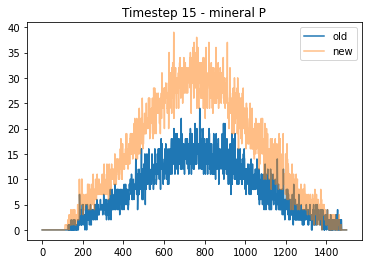

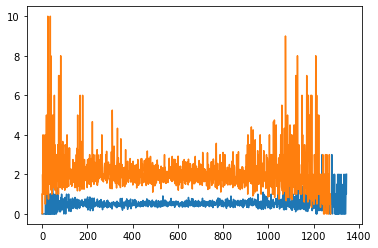

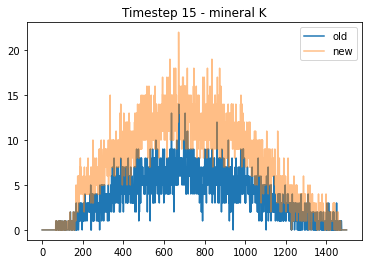

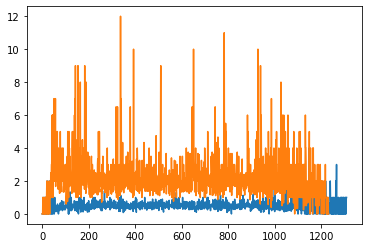

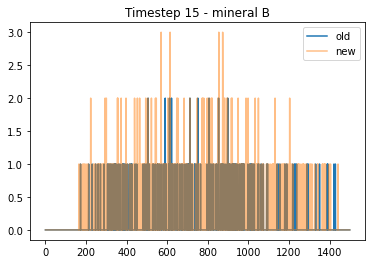

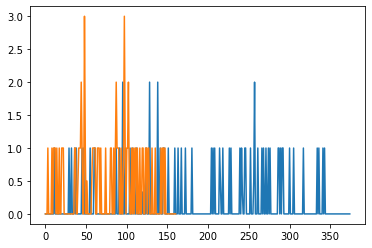

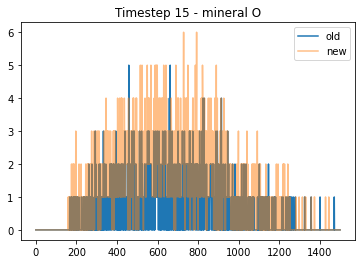

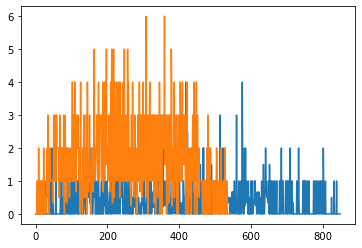

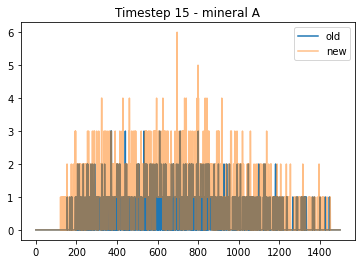

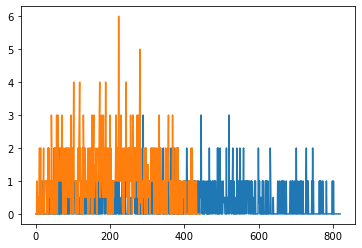

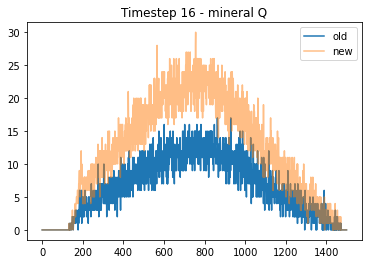

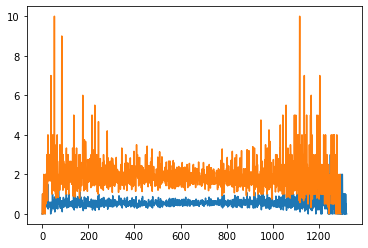

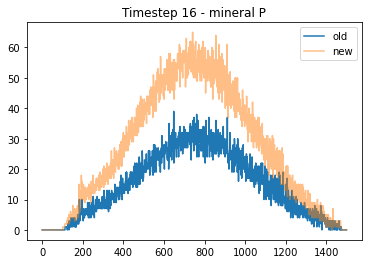

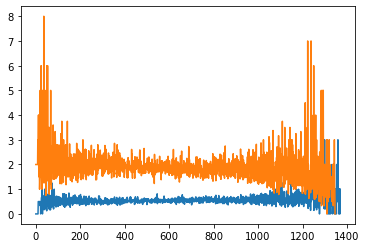

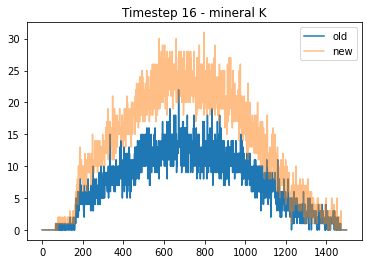

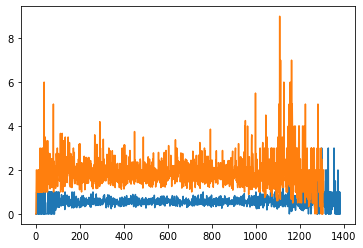

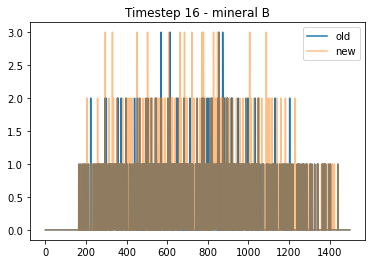

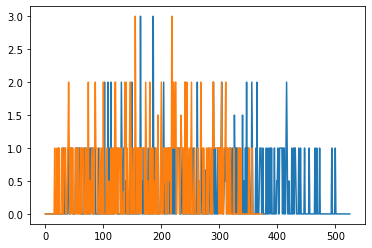

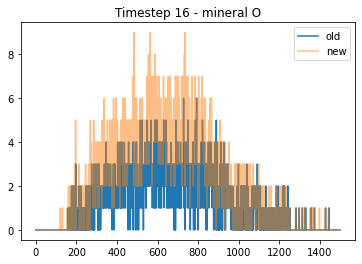

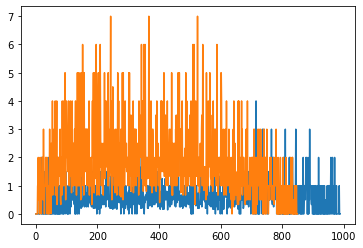

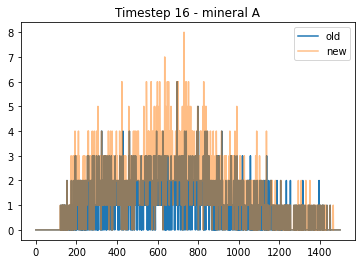

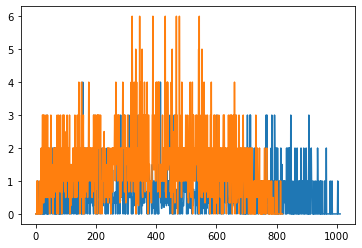

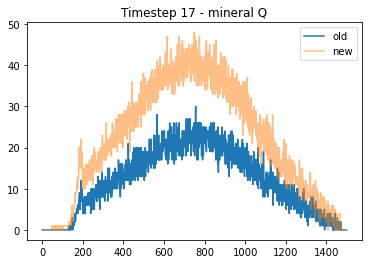

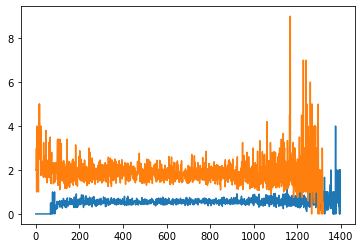

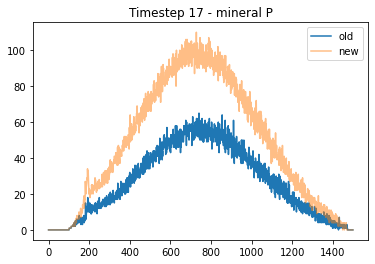

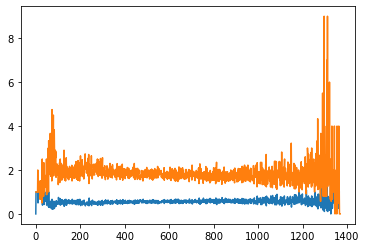

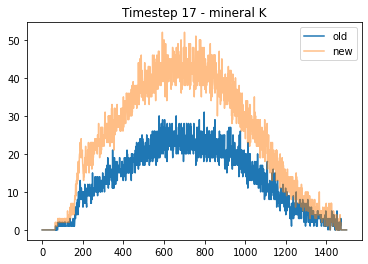

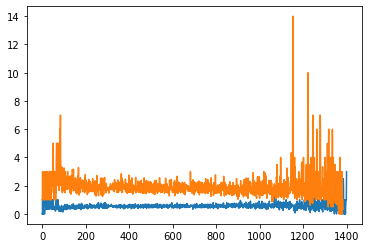

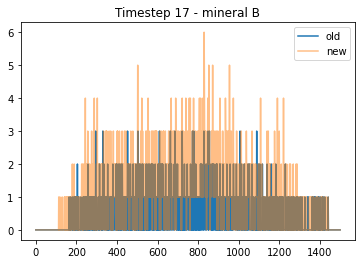

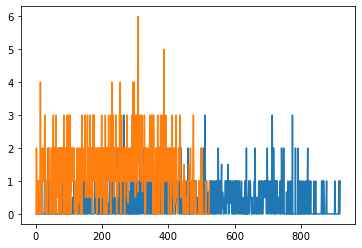

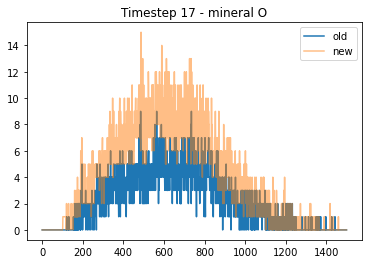

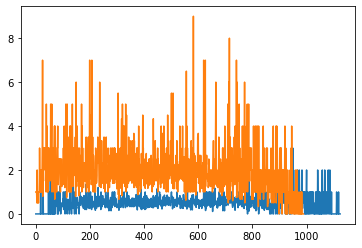

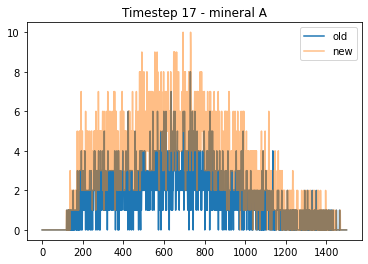

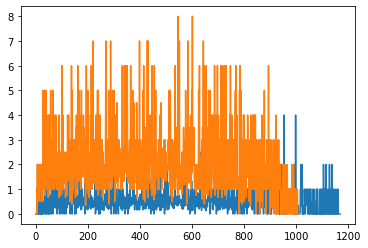

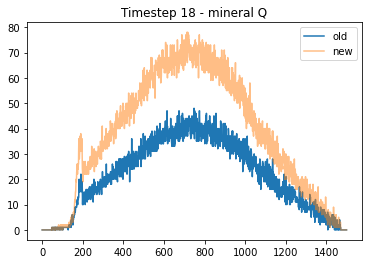

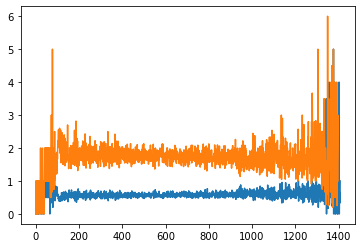

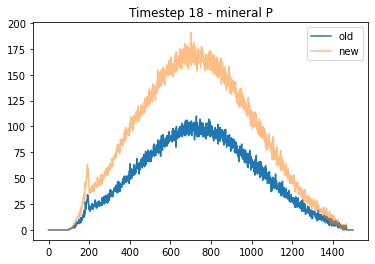

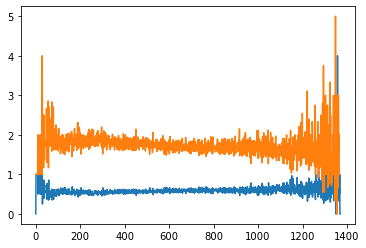

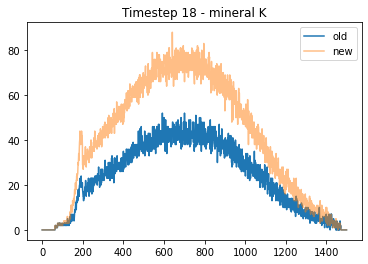

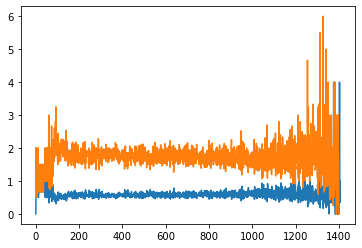

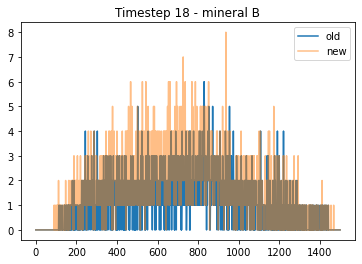

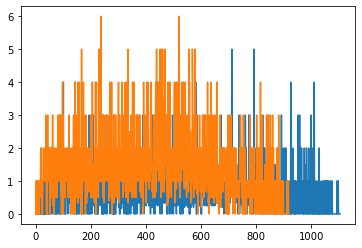

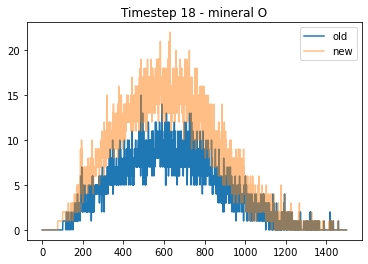

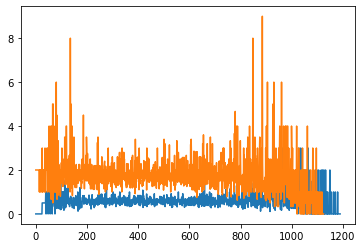

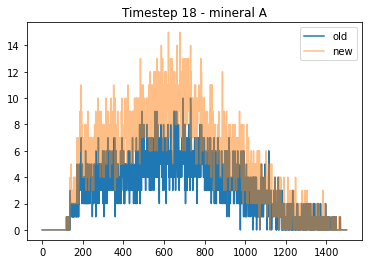

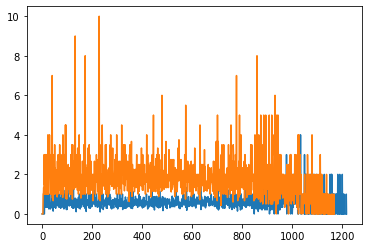

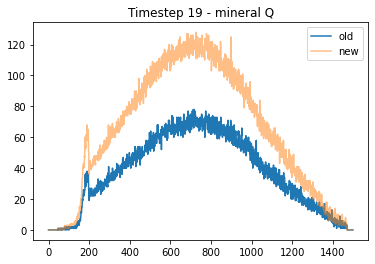

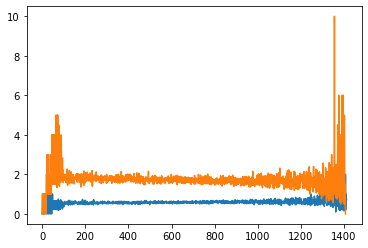

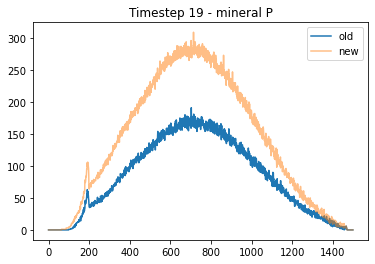

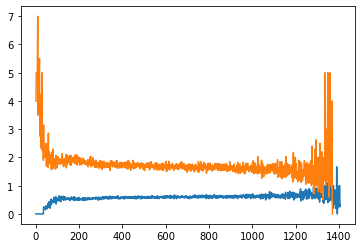

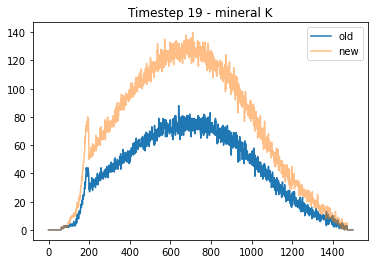

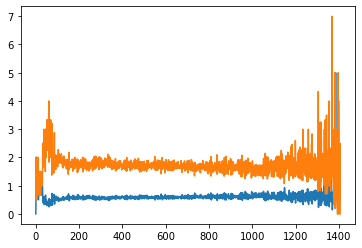

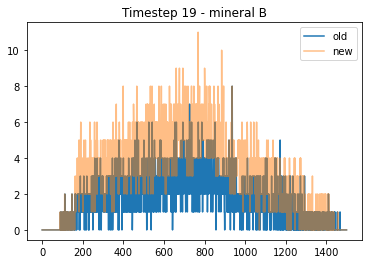

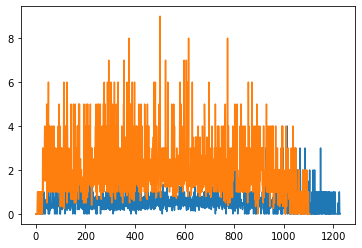

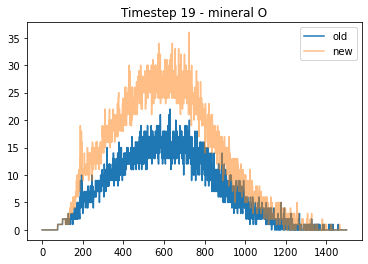

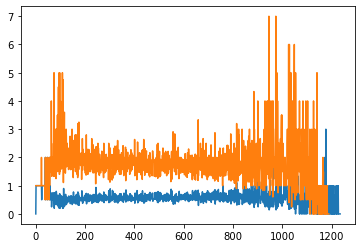

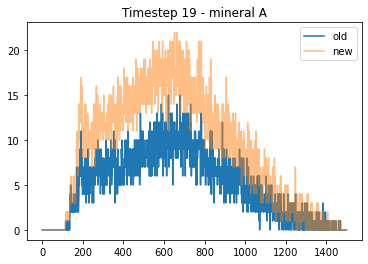

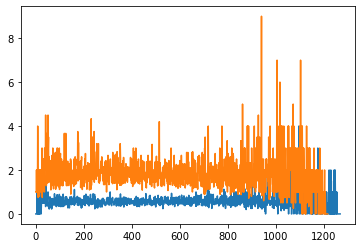

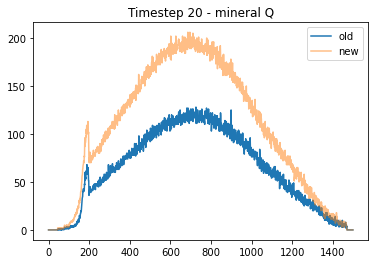

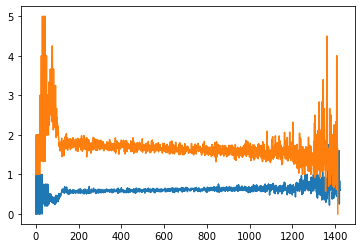

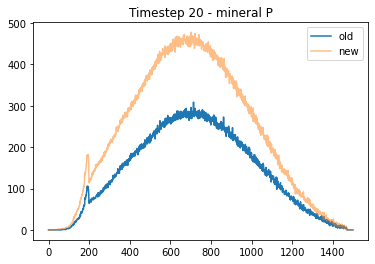

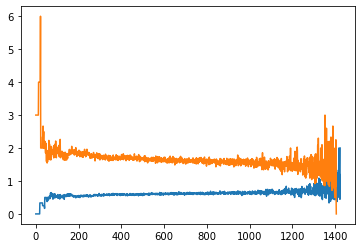

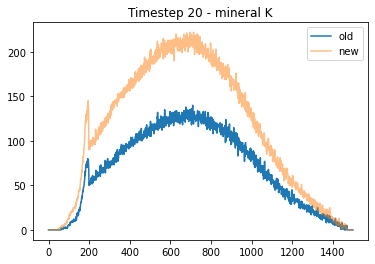

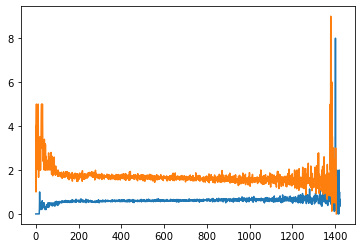

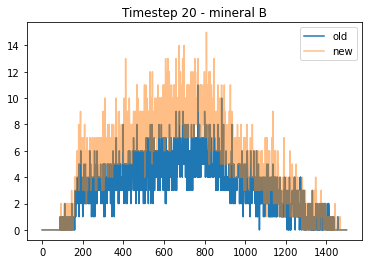

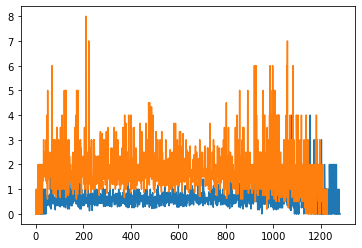

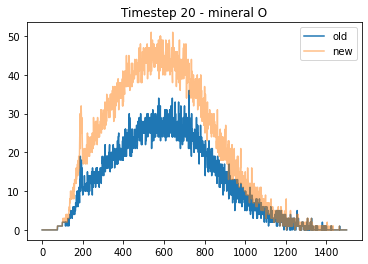

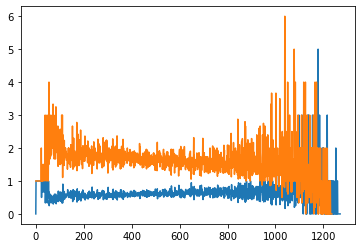

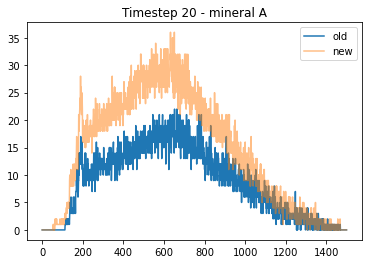

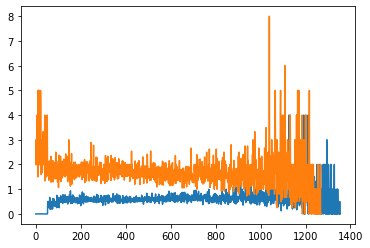

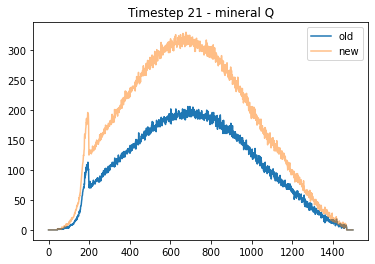

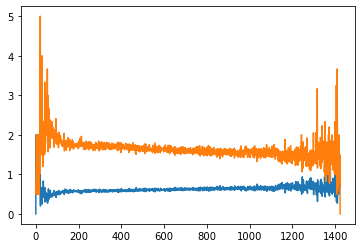

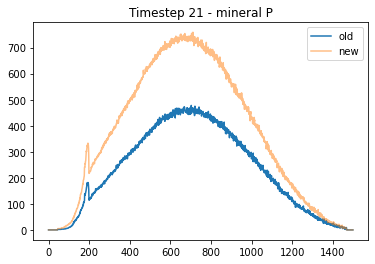

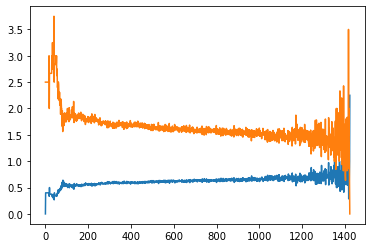

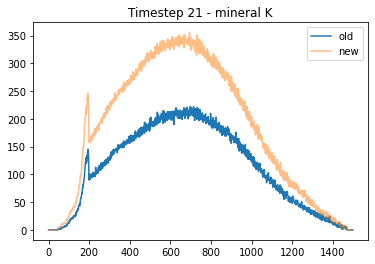

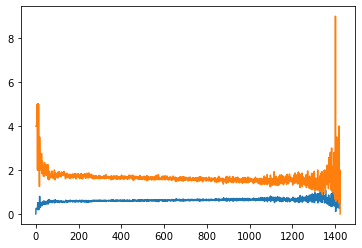

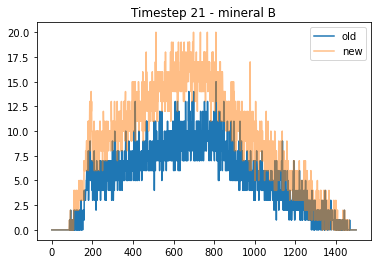

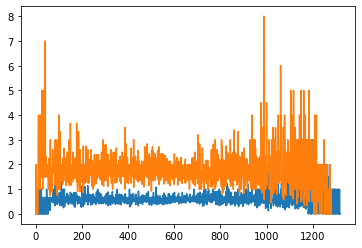

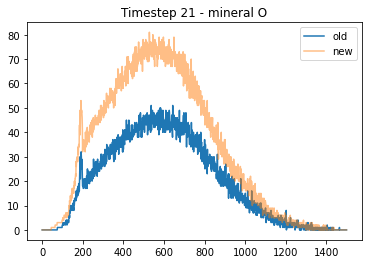

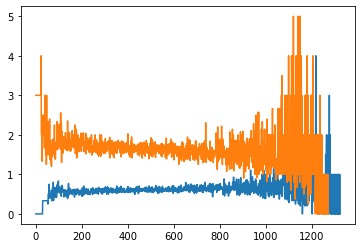

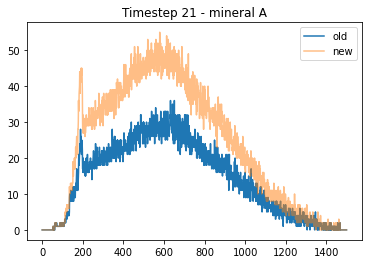

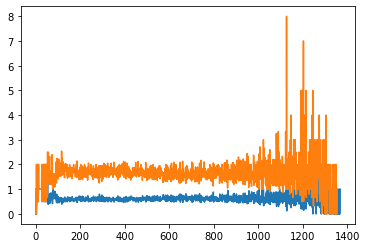

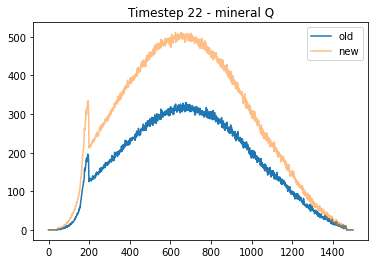

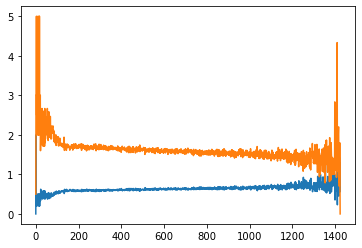

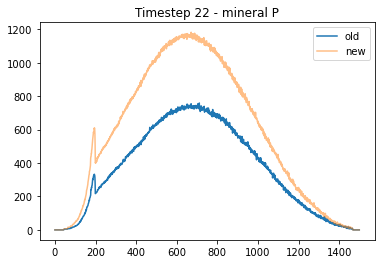

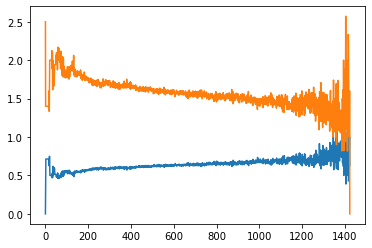

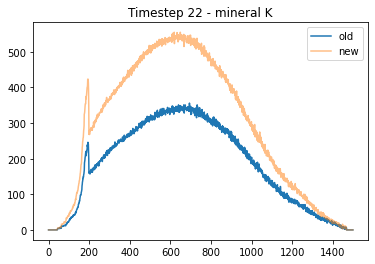

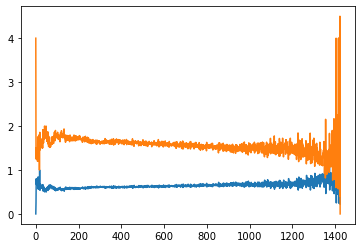

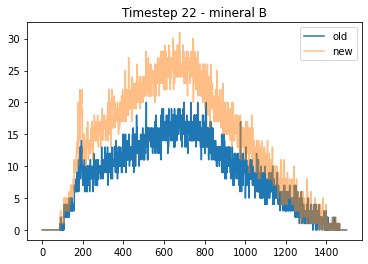

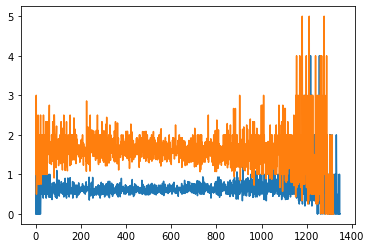

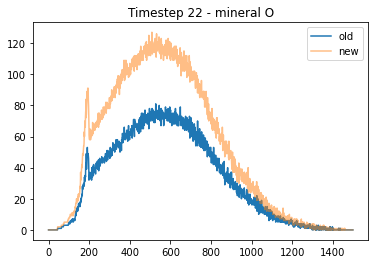

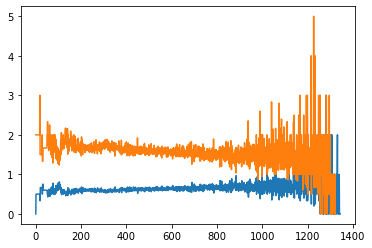

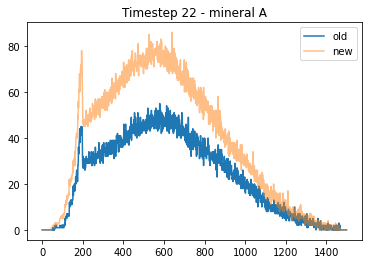

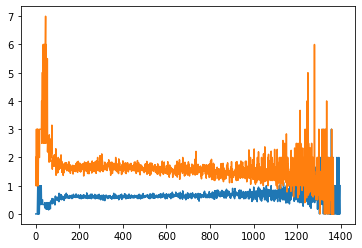

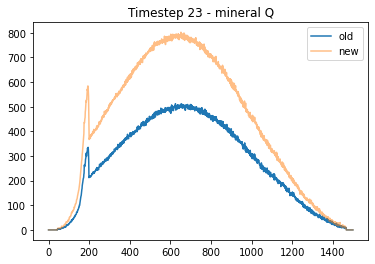

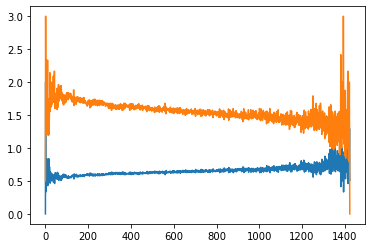

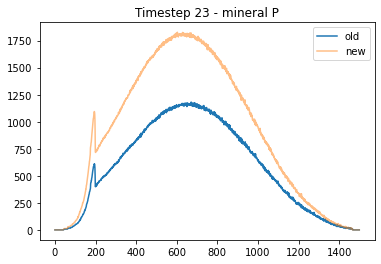

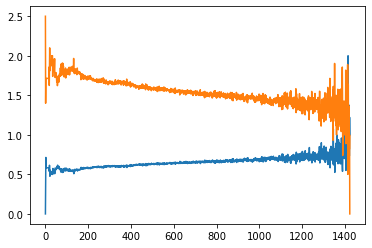

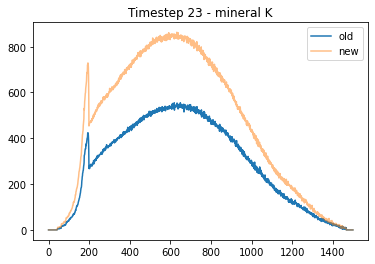

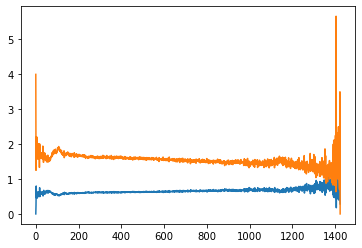

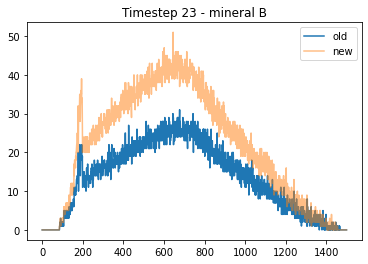

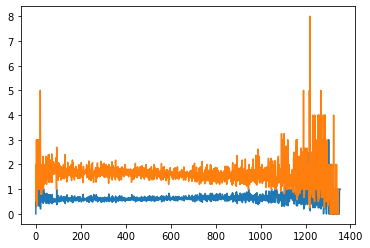

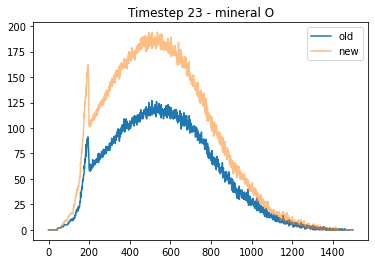

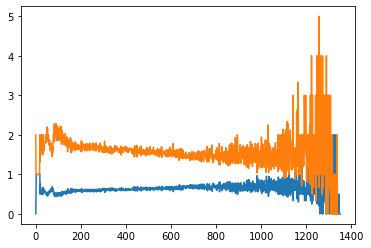

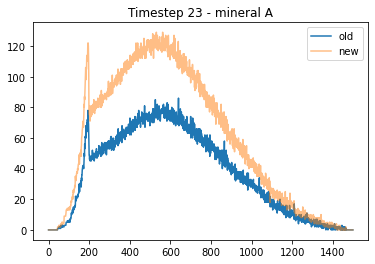

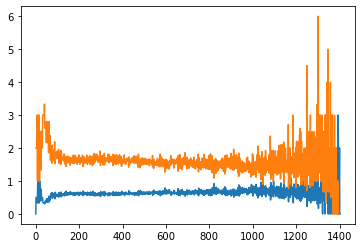

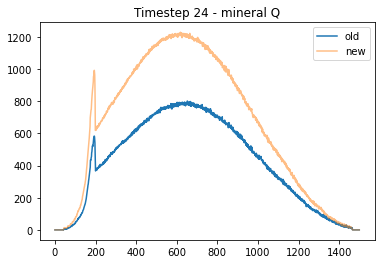

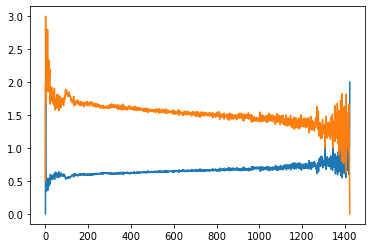

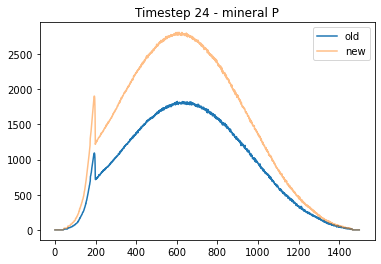

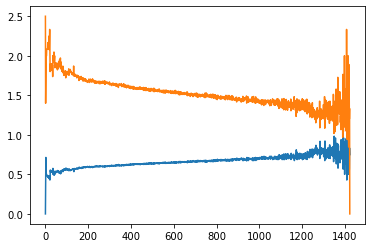

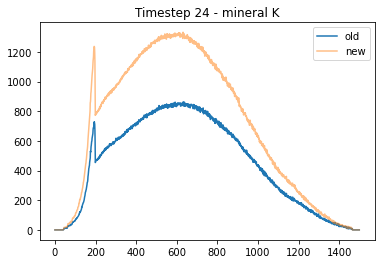

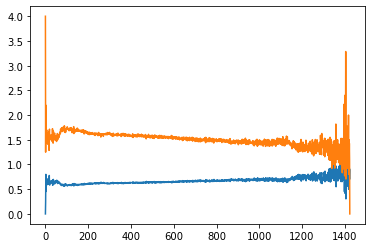

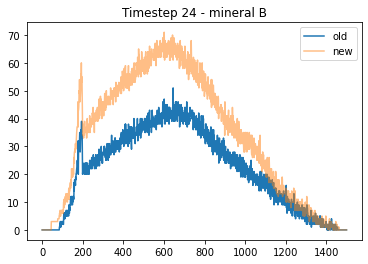

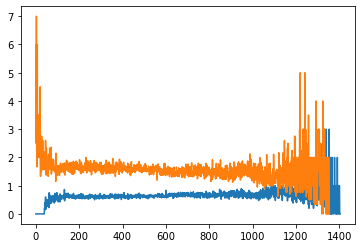

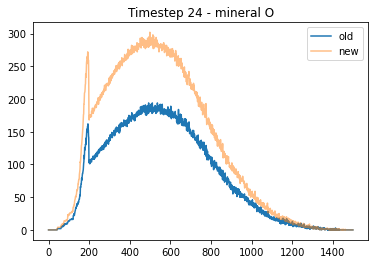

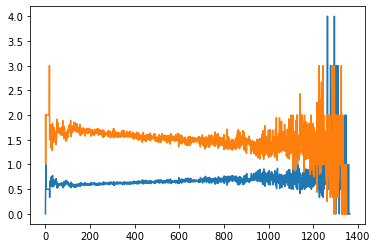

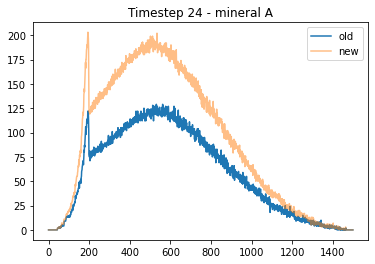

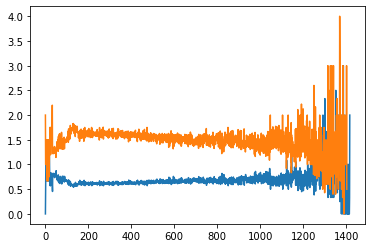

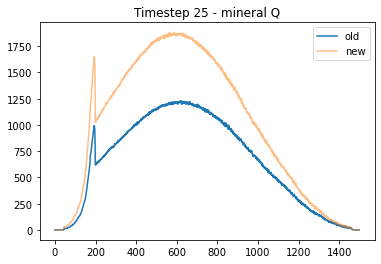

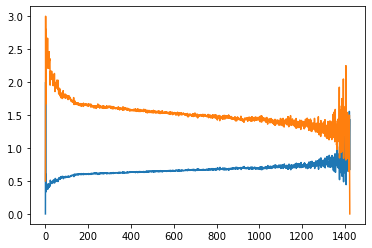

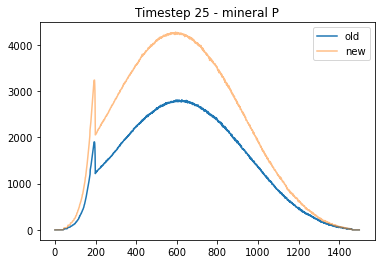

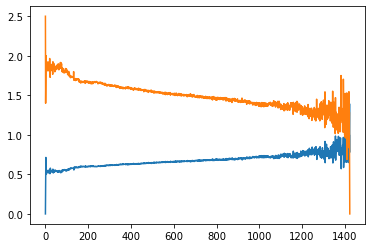

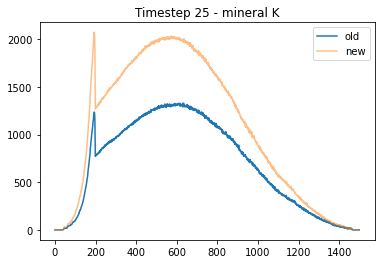

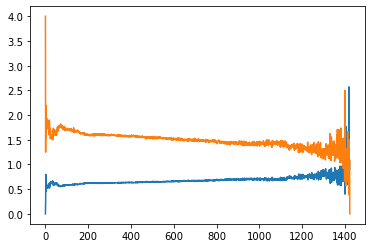

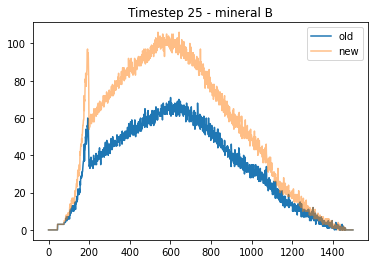

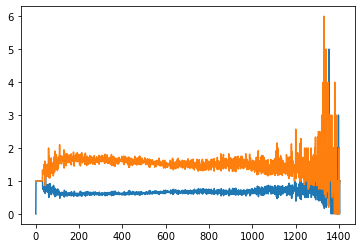

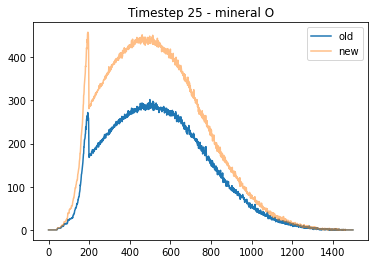

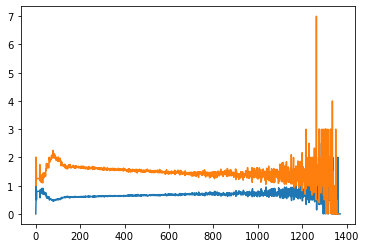

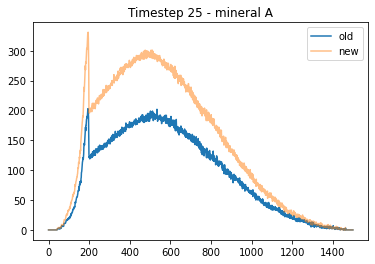

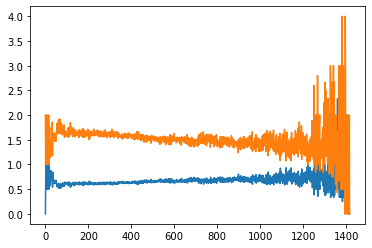

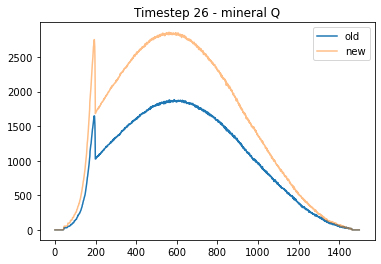

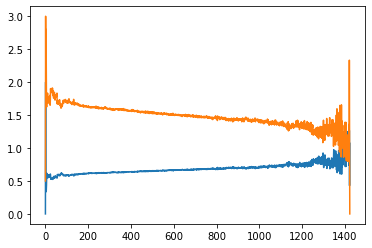

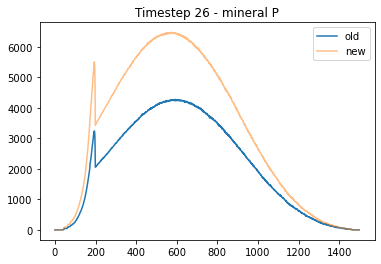

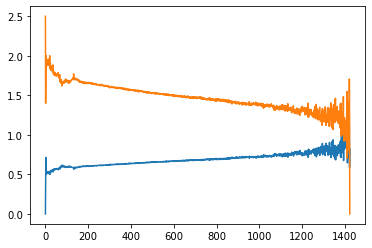

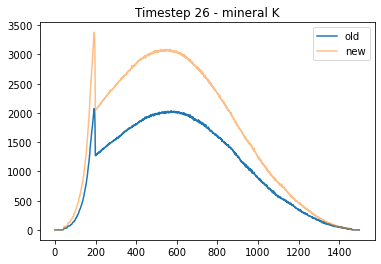

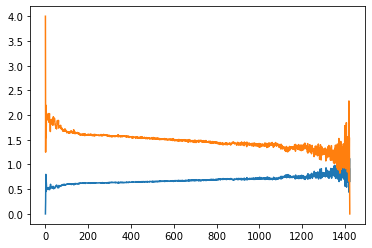

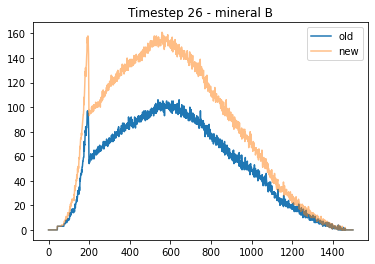

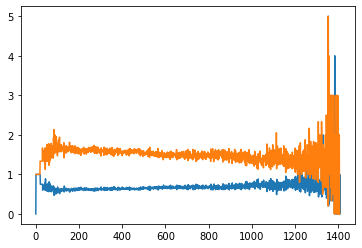

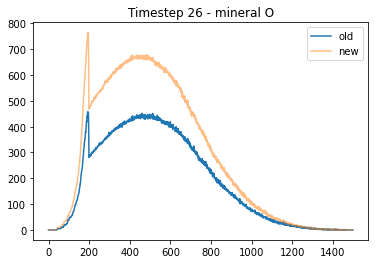

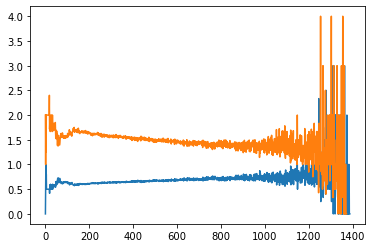

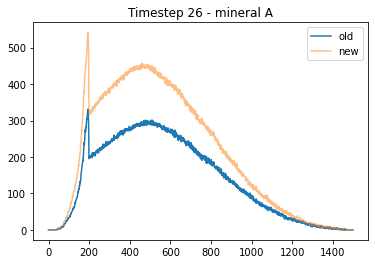

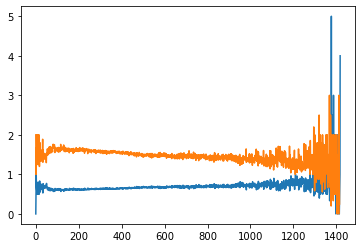

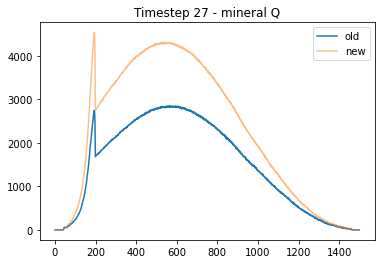

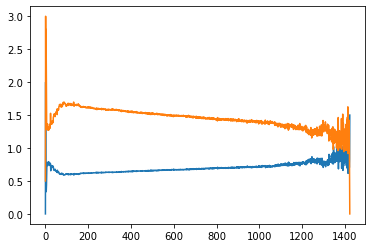

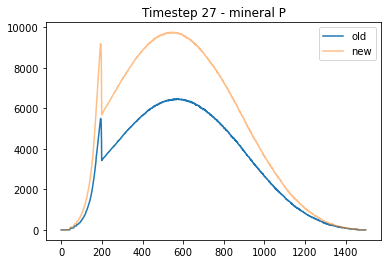

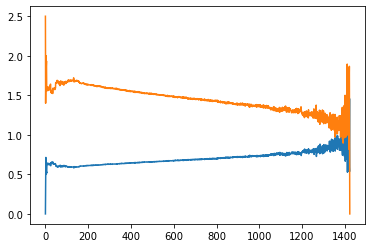

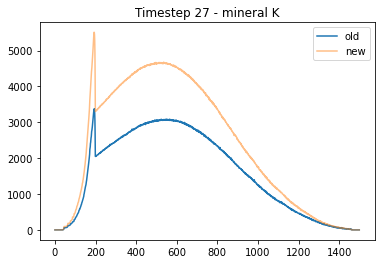

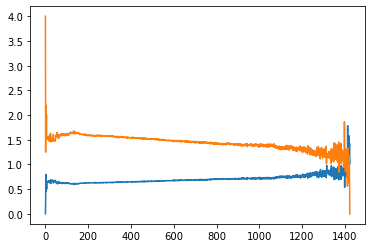

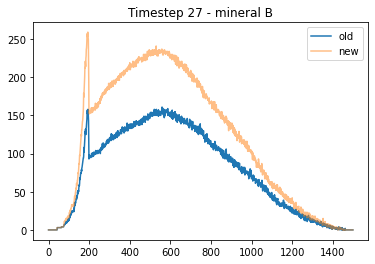

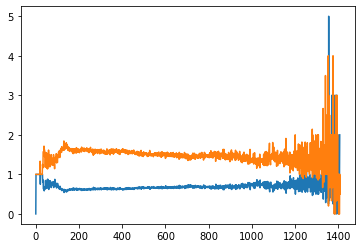

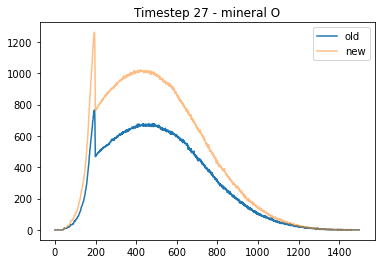

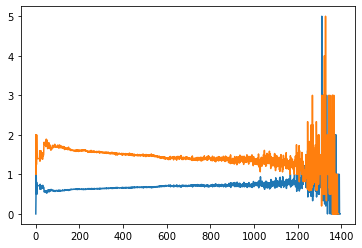

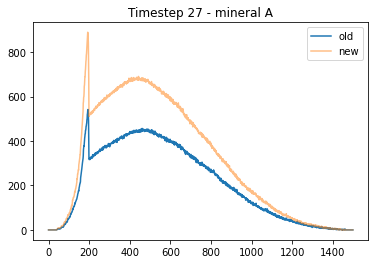

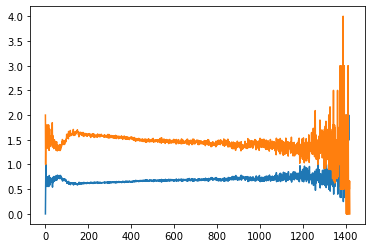

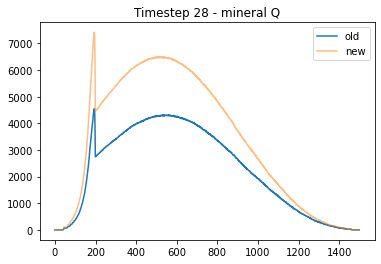

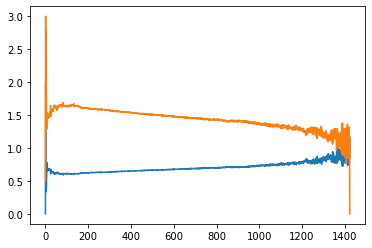

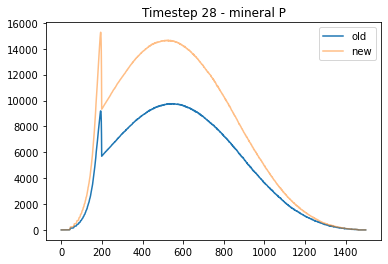

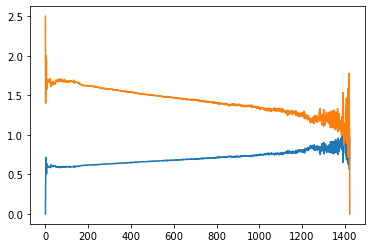

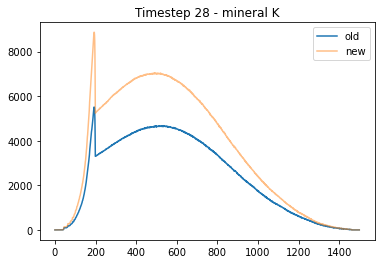

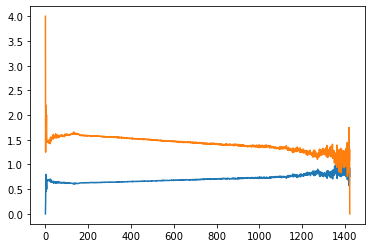

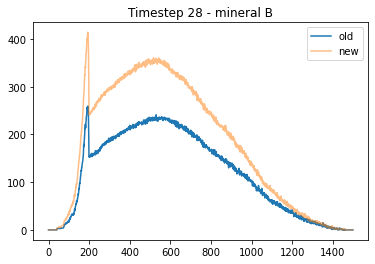

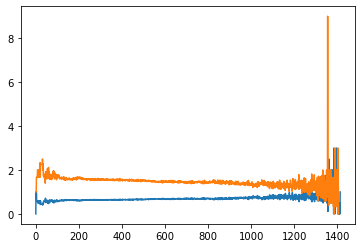

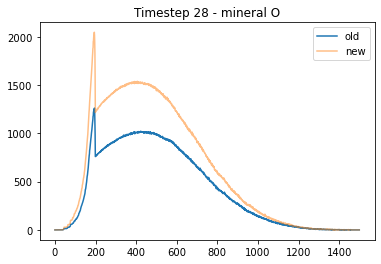

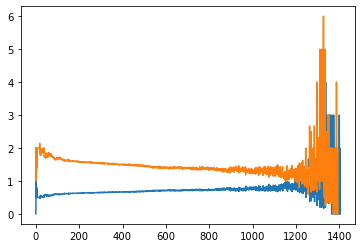

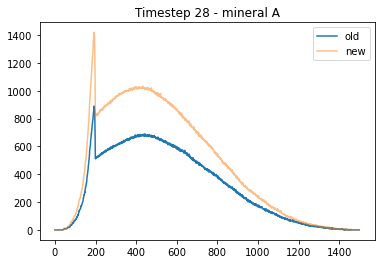

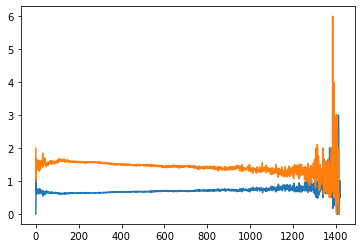

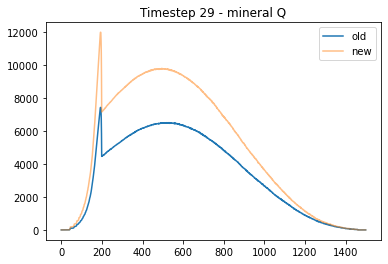

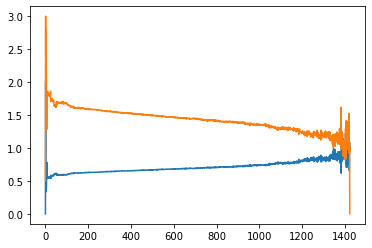

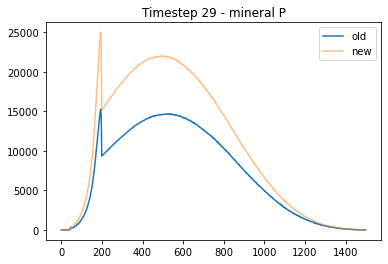

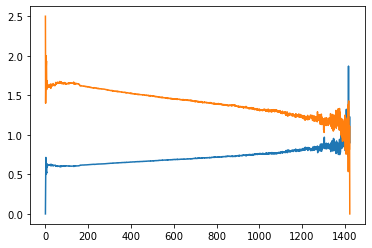

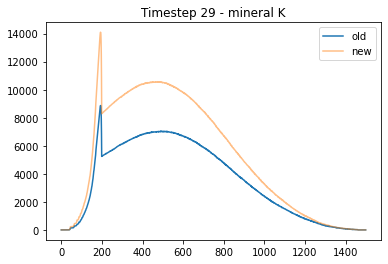

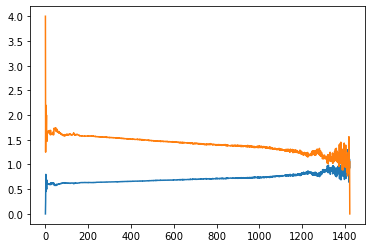

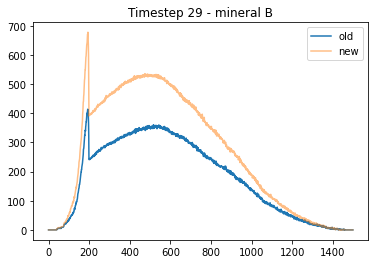

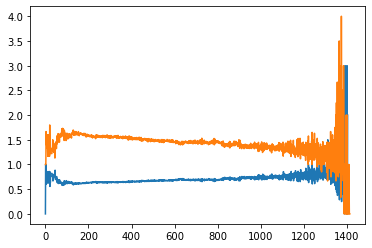

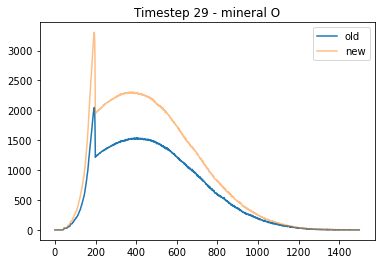

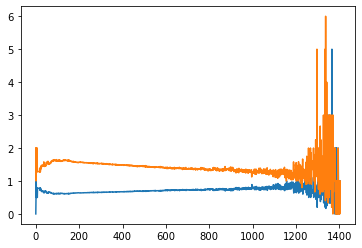

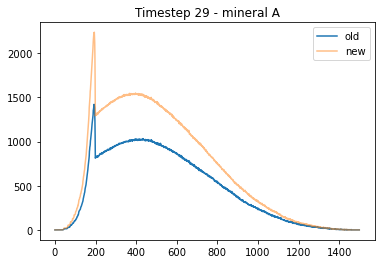

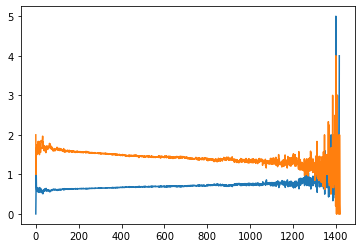

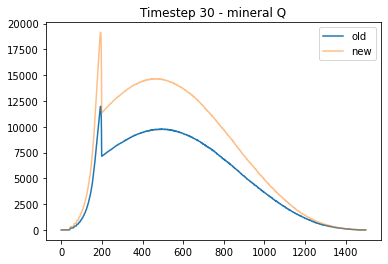

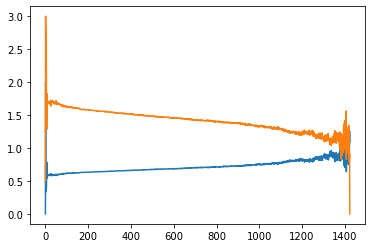

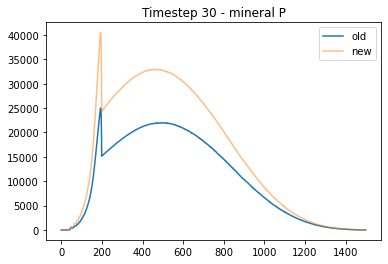

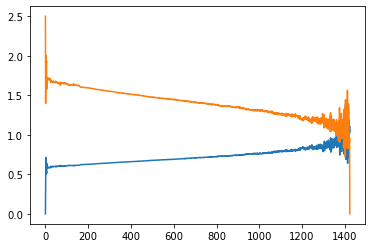

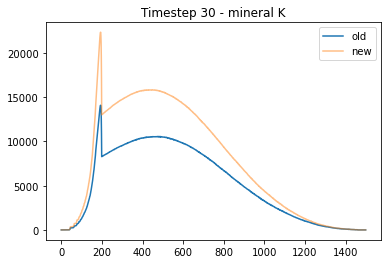

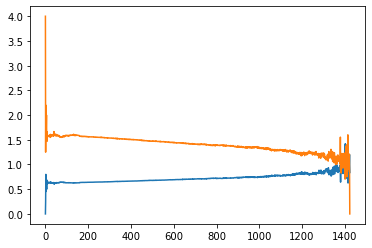

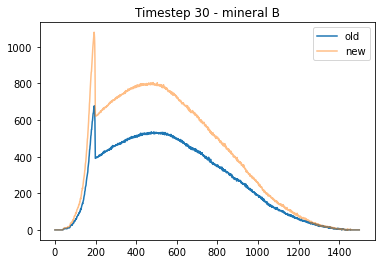

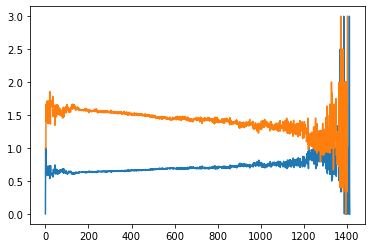

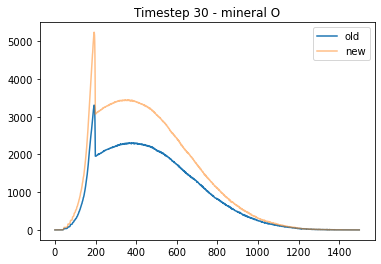

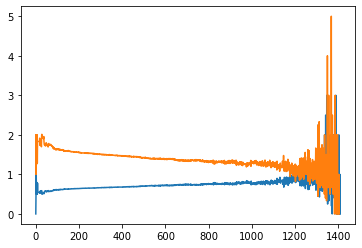

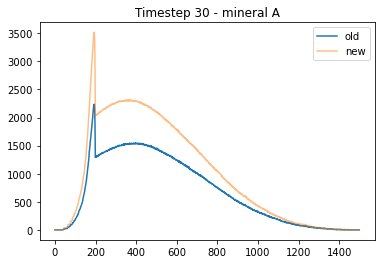

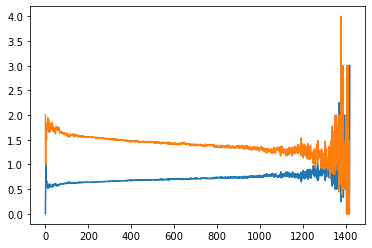

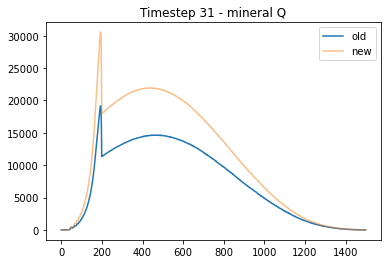

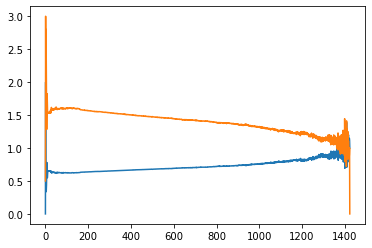

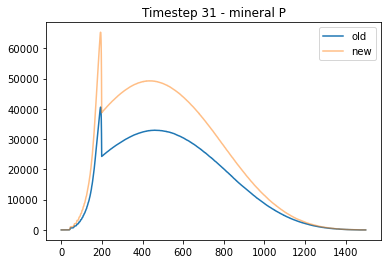

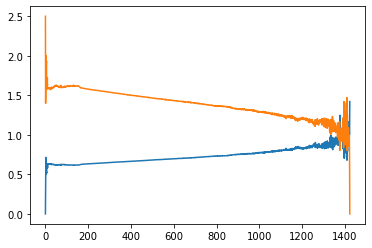

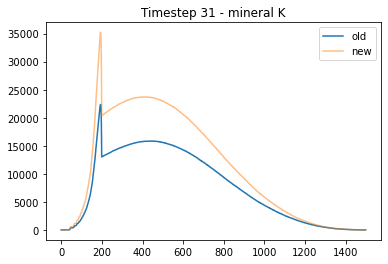

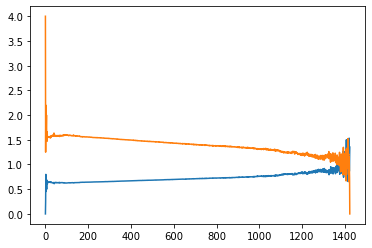

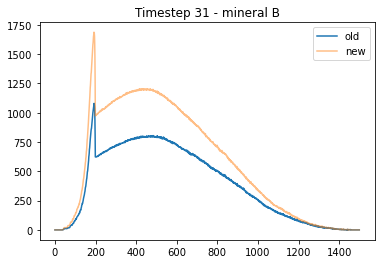

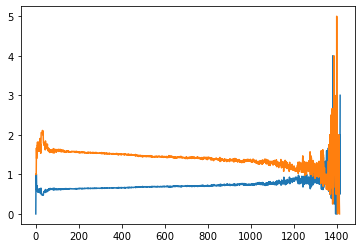

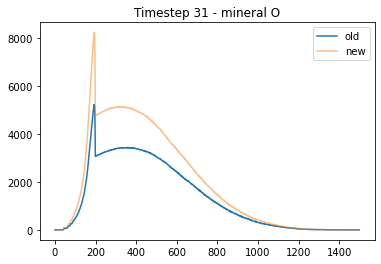

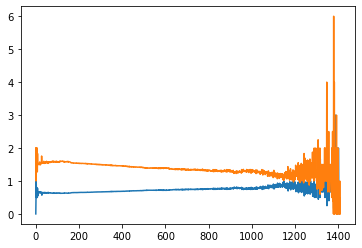

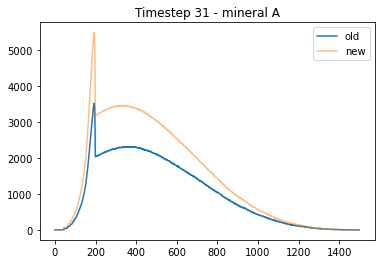

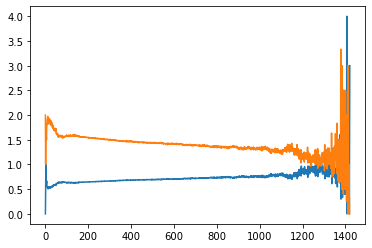

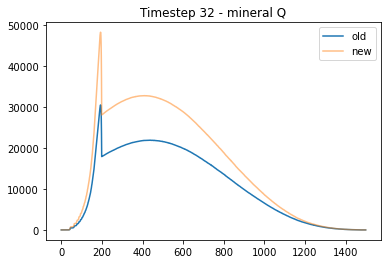

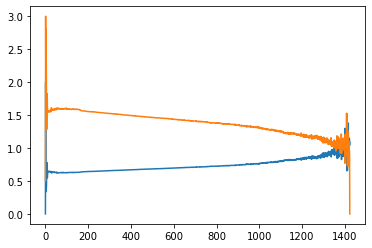

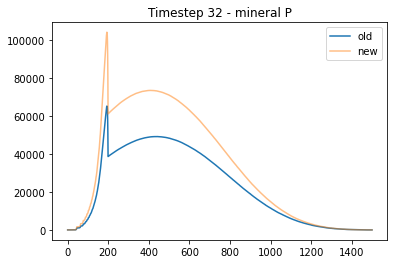

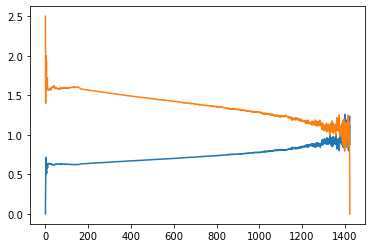

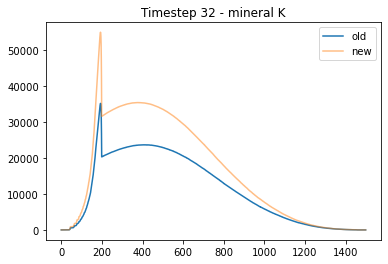

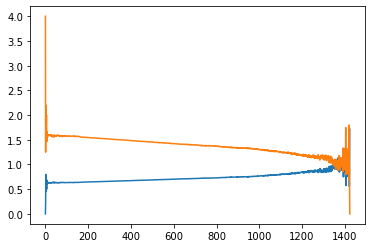

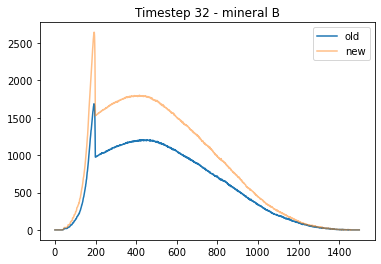

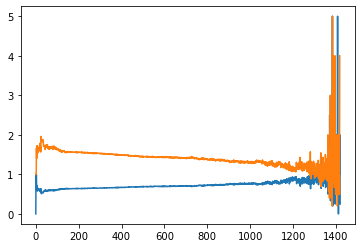

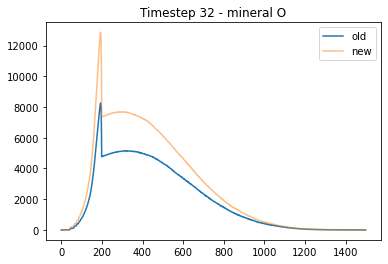

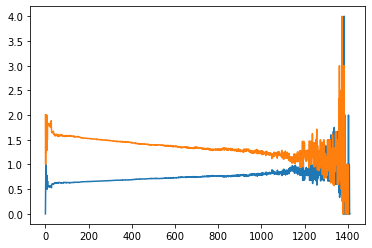

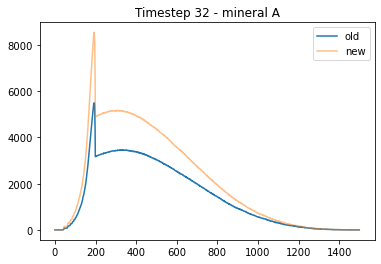

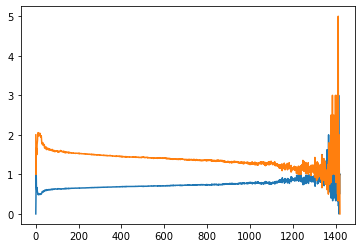

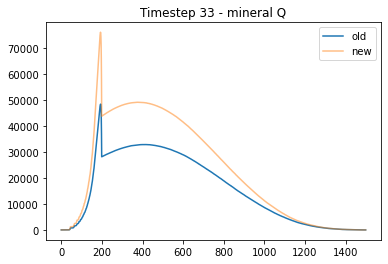

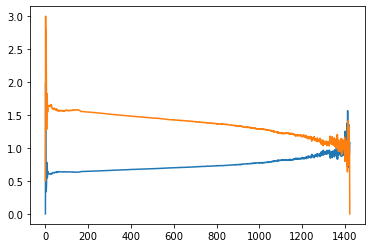

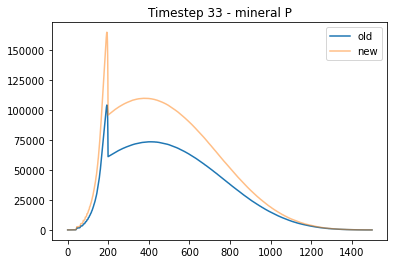

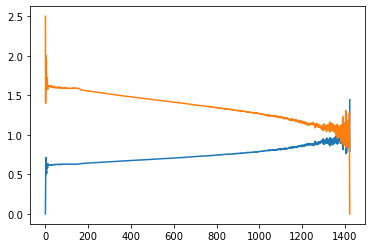

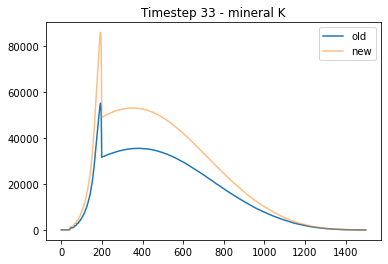

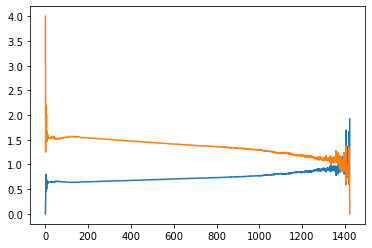

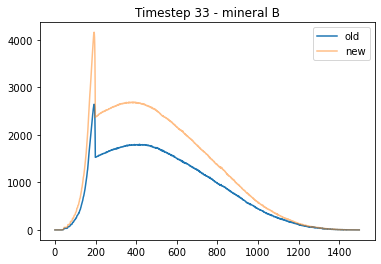

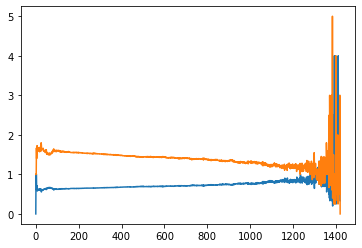

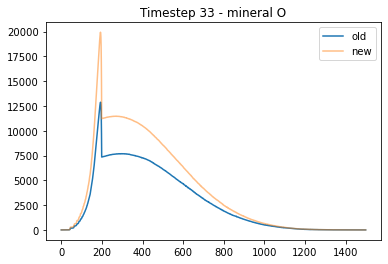

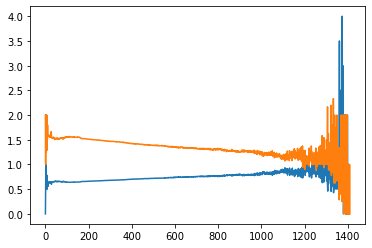

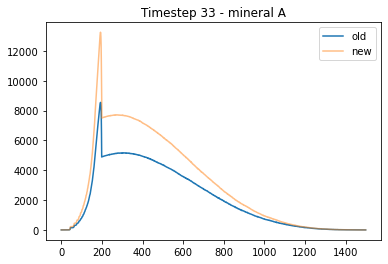

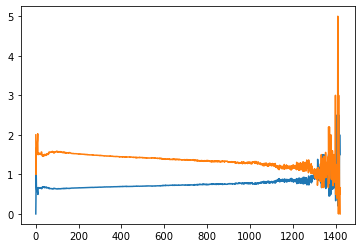

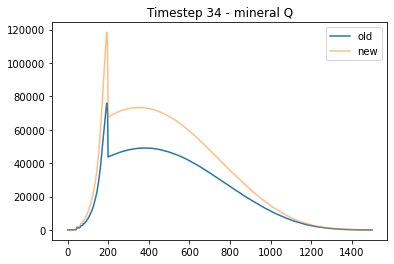

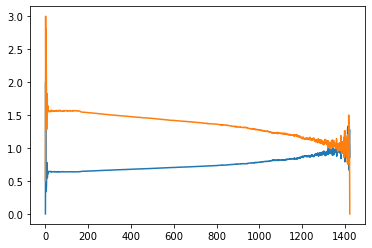

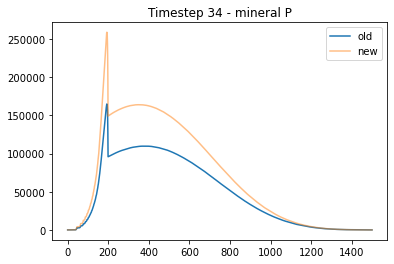

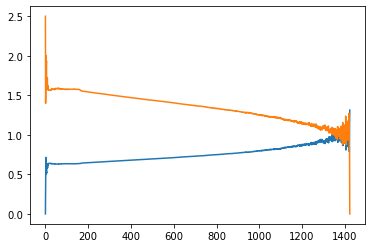

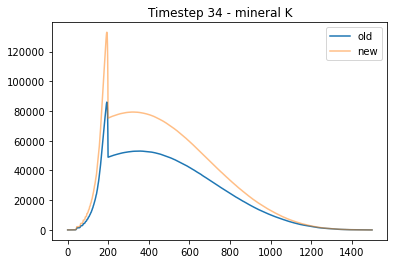

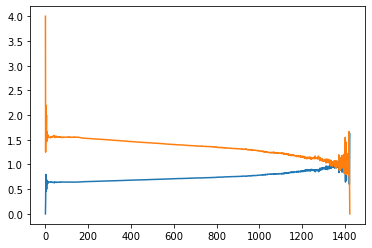

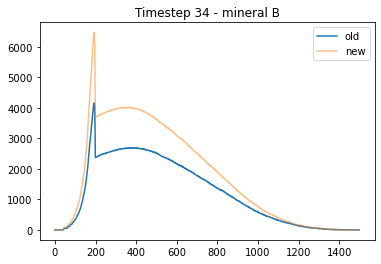

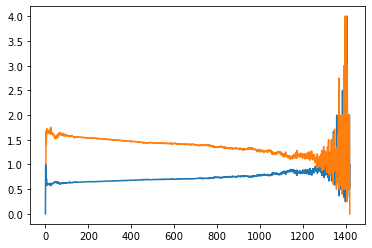

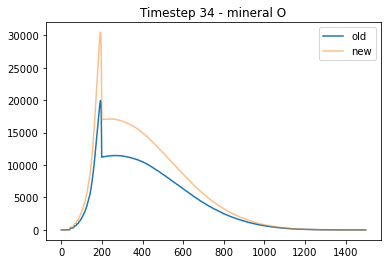

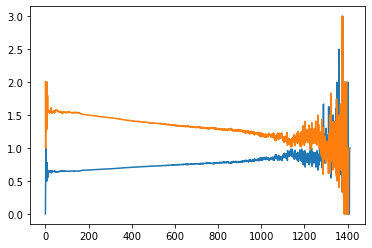

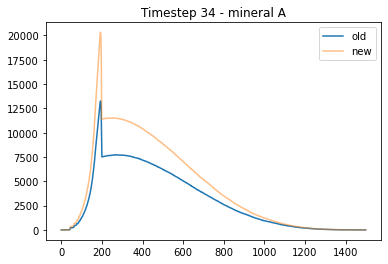

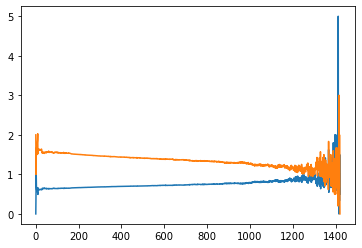

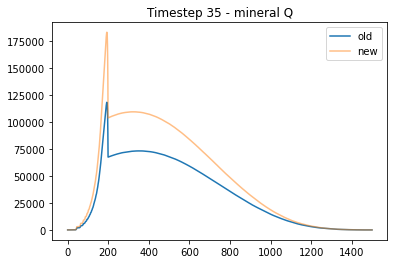

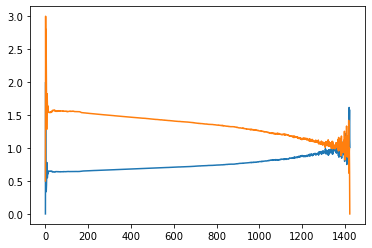

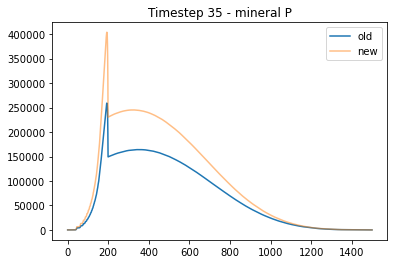

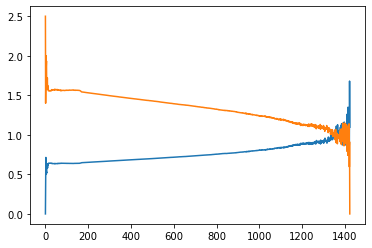

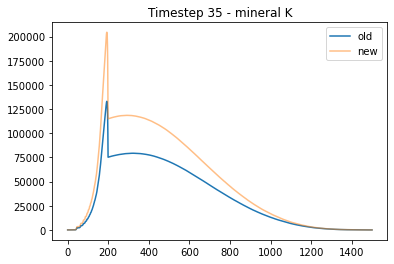

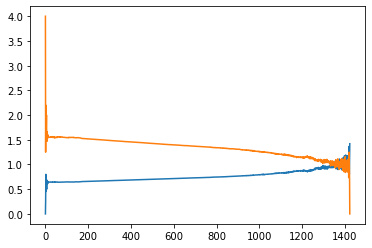

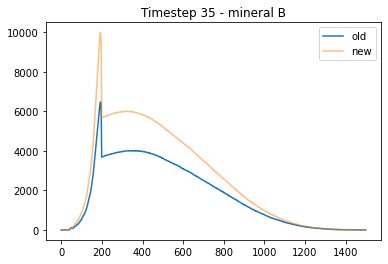

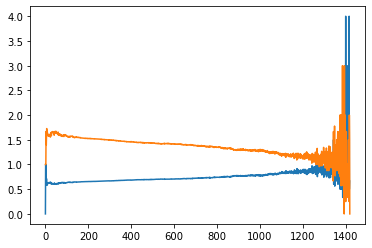

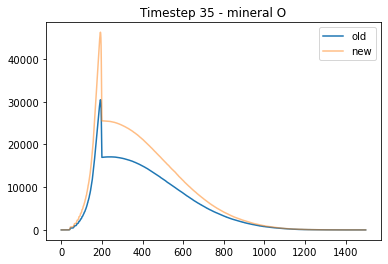

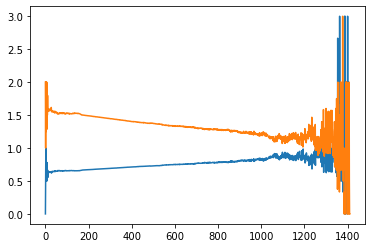

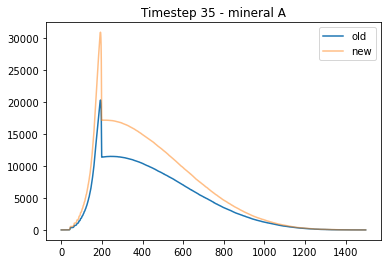

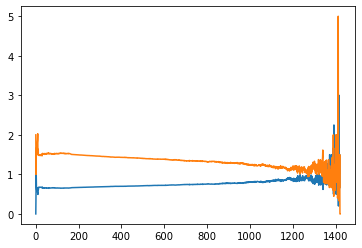

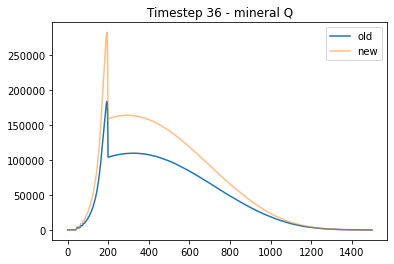

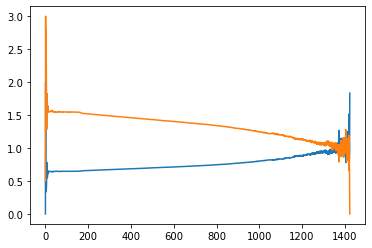

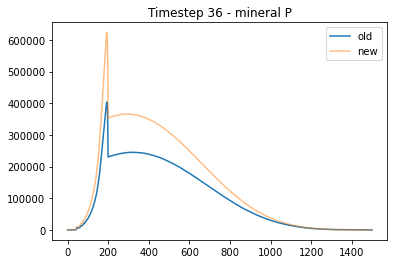

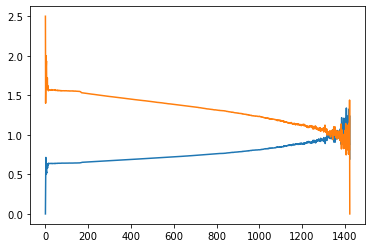

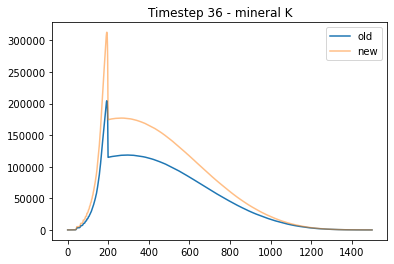

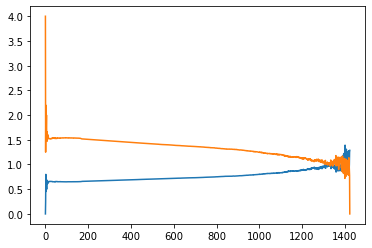

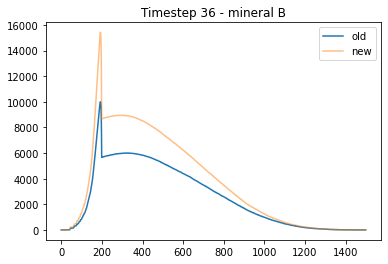

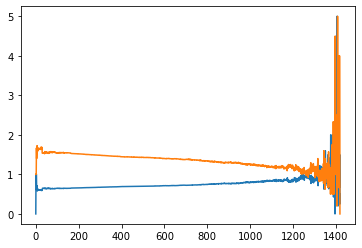

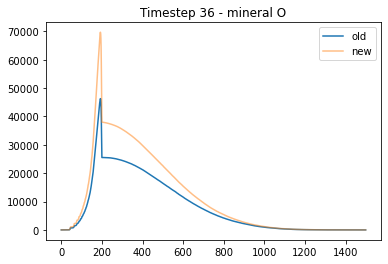

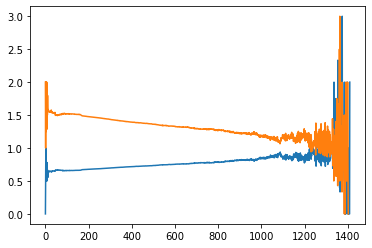

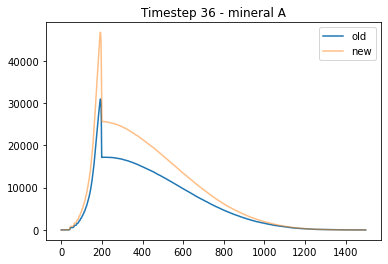

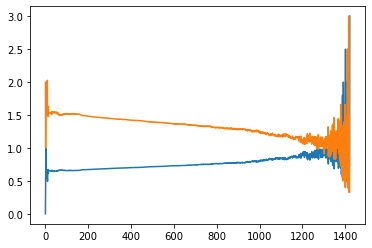

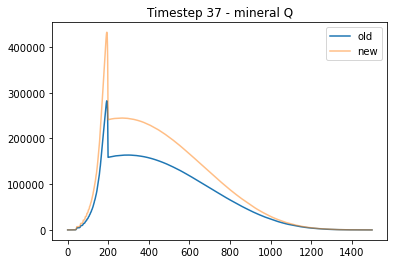

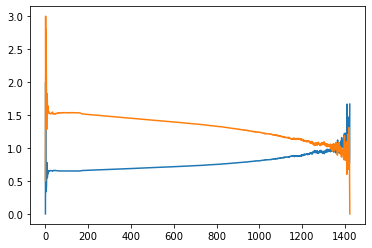

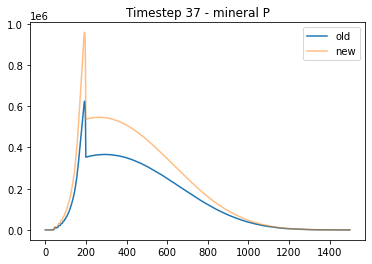

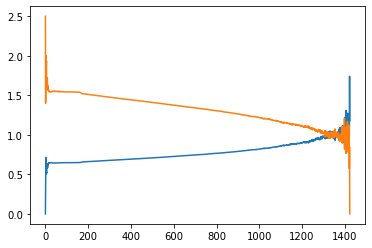

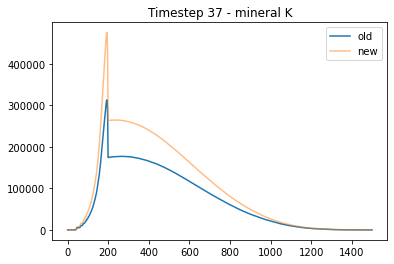

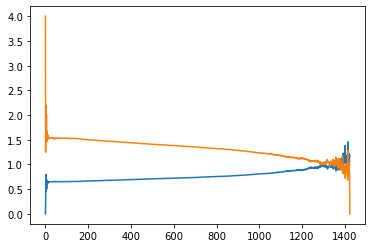

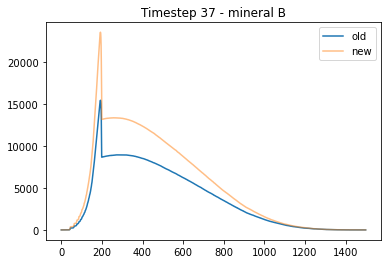

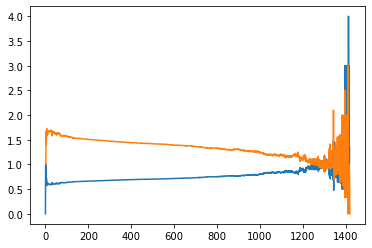

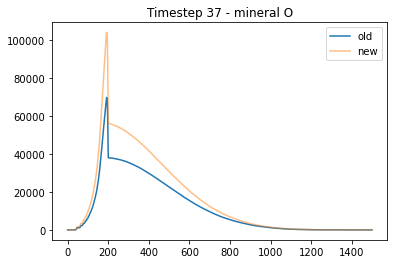

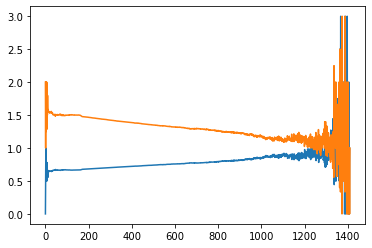

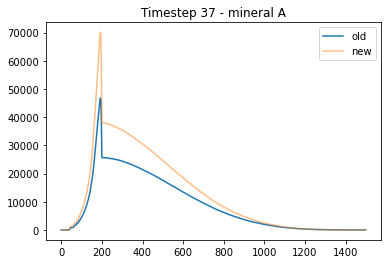

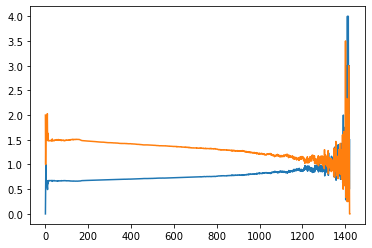

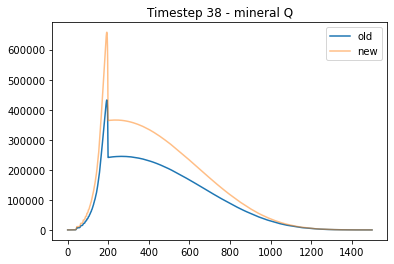

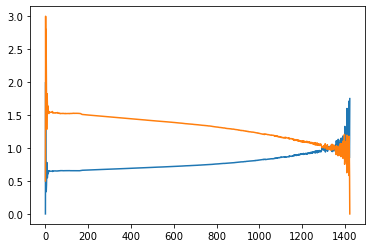

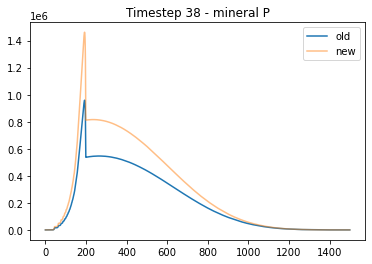

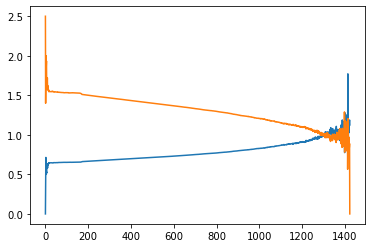

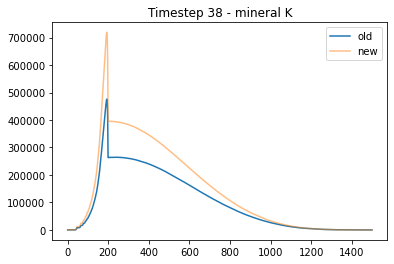

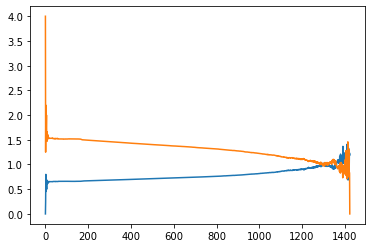

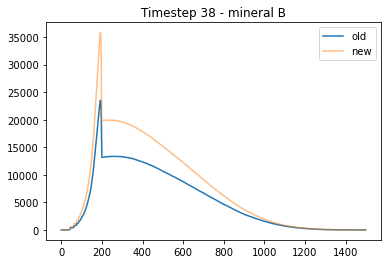

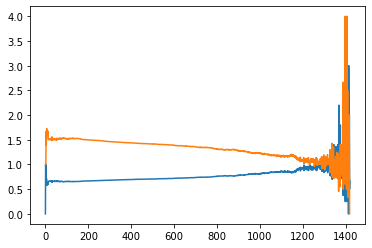

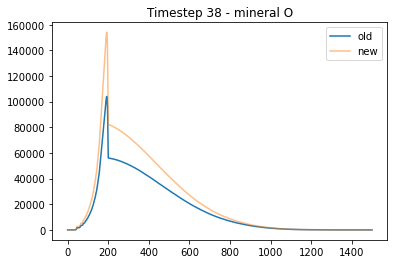

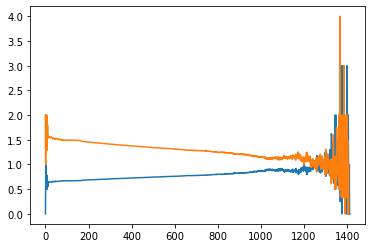

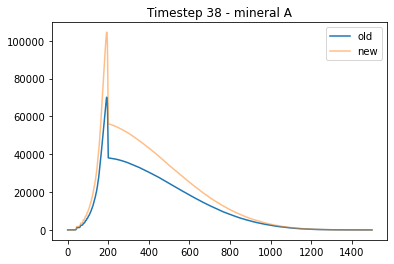

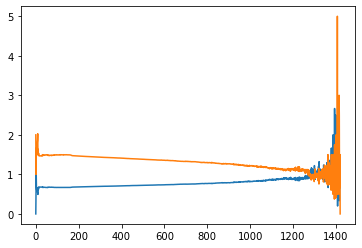

In [65]:
for n, (mcg_old, mcg_new) in enumerate(zip(sedgen_CA_NS_weathered_after[-1][:-1], sedgen_CA_NS_weathered_after[-1][1:])):
    for i in range(6):
        # plt.bar(range(1500), height=mcg_old[0], label="old")
        plt.plot(range(1500), mcg_old[i], label="old")
        # plt.bar(range(1500), height=mcg_new, label="new", alpha=0.5)
        plt.plot(range(1500), mcg_new[i], label="new", alpha=0.5)
        plt.title(f"Timestep {n} - mineral {sedgen_CA_NS.minerals[i]}")
        plt.legend()
        plt.show();
        
        plt.plot(np.divide(mcg_old[i][mcg_new[i] != 0], mcg_new[i][mcg_new[i] != 0]))
        plt.plot(np.divide(mcg_new[i][mcg_old[i] != 0], mcg_old[i][mcg_old[i] != 0]))
        plt.show();
pass;

In [165]:
mcg_ratios = np.zeros((sedgen_CA_NS_weathered.n_timesteps-1, sedgen_CA_NS_weathered.n_minerals, sedgen_CA_NS_weathered.n_bins), dtype=np.float64)

for n, (mcg_old, mcg_new) in enumerate(zip(sedgen_CA_NS_weathered_after[-1][:-1], sedgen_CA_NS_weathered_after[-1][1:])):
    for i in range(6):
        ratio = np.divide(mcg_old[i], mcg_new[i], out=np.zeros(mcg_old[i].shape, dtype=np.float64), where=mcg_new[i]!=0)
        mcg_ratios[n][i] = ratio

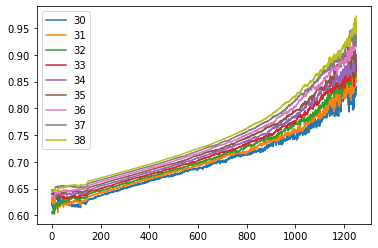

In [20]:
for n in range(30, 39):
    plt.plot(mcg_ratios[n, 0][50:1300], label=n)
plt.legend()
plt.show();

In [92]:
def fit_totally_new(x, a, b, c):
    y = a * x ** b + c
    return y

In [126]:
# Totaly new fitting
t_opt, t_cov = curve_fit(fit_totally_new, sedgen_CA_NS.volume_bins_medians[50:1400], mcg_ratios[38, 0][50:1400])
t_opt

array([0.19112729, 0.09443835, 0.62904408])

In [223]:
t_opts = np.zeros((sedgen_CA_NS_weathered.n_timesteps - 1, 3))

for n in range(sedgen_CA_NS_weathered.n_timesteps - 1):
    try:
        t_opt, t_cov = curve_fit(fit_totally_new, sedgen_CA_NS.volume_bins_medians[50:1400], mcg_ratios[n, 2][50:1400])
    except RuntimeError as error:
        t_opt = np.array([np.nan, np.nan, np.nan])
    t_opts[n] = t_opt

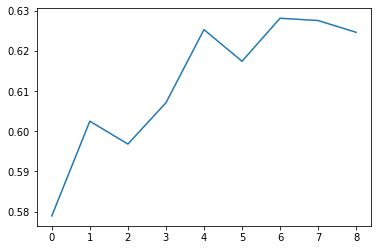

In [226]:
plt.plot(t_opts[:, 2][30:])

In [124]:
mcg_ratio_fitted = fit_totally_new(sedgen_CA_NS.volume_bins_medians[0:], *t_opt)

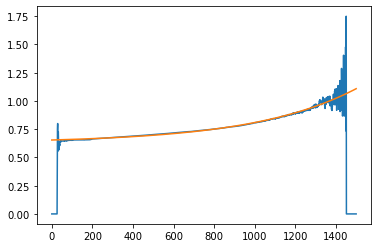

In [125]:
plt.plot(mcg_ratios[38, 0])
# plt.plot(range(50, 1300))
plt.plot(mcg_ratio_fitted)

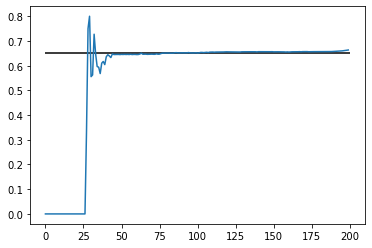

In [111]:
plt.plot(mcg_ratios[38, 0][:200])
plt.hlines(0.65, 0, 200, color='k')

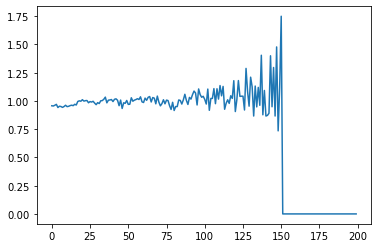

In [112]:
plt.plot(mcg_ratios[38, 0][1300:])

In [46]:
def logit(x):
    return np.log(x / (1-x))

C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\u0108248\AppData\Local\Continuum\miniconda3\envs\sedgen\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


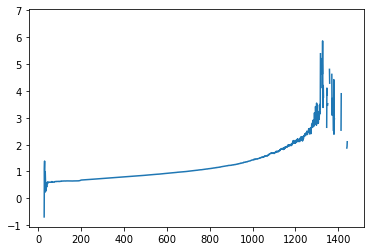

In [48]:
plt.plot(logit(mcg_ratios[38, 0]), label=n)

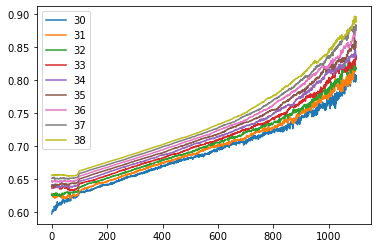

In [133]:
for n in range(30, 39):
    plt.plot(mcg_ratios[n, 0][100:1200], label=n)
plt.legend()
plt.show();

In [40]:
mcg_old = sedgen_CA_NS_weathered_after[1].copy()

In [41]:
p = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])
search_bins = sedgen_CA_NS.search_bins_medians.copy()
intra_cb_breaks = sedgen_CA_NS_weathered.intra_cb_breaks.copy()
diffs_volumes = sedgen_CA_NS_weathered.diffs_volumes.copy()

In [87]:
%timeit weathering.perform_intra_crystal_breakage_2d(mcg_old[0], p, 0, search_bins, intra_cb_breaks, diffs_volumes, verbose=False, intra_cb_dict_keys=sedgen_CA_NS_weathered.intra_cb_dict_keys, intra_cb_dict_values=sedgen_CA_NS_weathered.intra_cb_dict_values)

47.9 ms ± 780 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
mcg_new, _, _ = weathering.perform_intra_crystal_breakage_2d(mcg_old[0], p, 0, search_bins, intra_cb_breaks, diffs_volumes, verbose=False, intra_cb_dict_keys=sedgen_CA_NS_weathered.intra_cb_dict_keys, intra_cb_dict_values=sedgen_CA_NS_weathered.intra_cb_dict_values)

**To Do**
- Check all minerals, not only Quartz
- Create plots for various timesteps --> Keep track of mcg evolution during one weathering function
- Create plots for various permutations of one timestep
- Determine 'transformation' function(s) --> One below intra_cb_threshold and one above

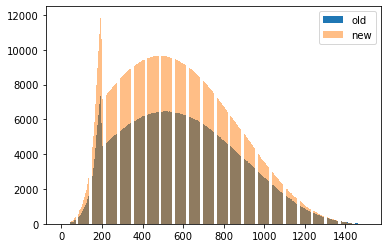

In [34]:
# n_timesteps=30
plt.bar(range(1500), height=mcg_old[0], label="old")
plt.bar(range(1500), height=mcg_new, label="new", alpha=0.5)
plt.legend()
plt.show();

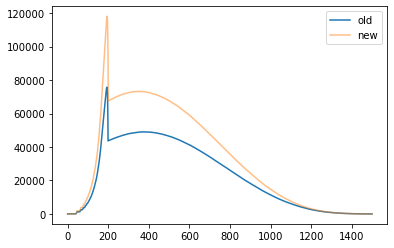

In [47]:
# n_timesteps=35
# plt.bar(range(1500), height=mcg_old[0], label="old")
plt.plot(range(1500), mcg_old[0], label="old")
# plt.bar(range(1500), height=mcg_new, label="new", alpha=0.5)
plt.plot(range(1500), mcg_new, label="new", alpha=0.5)
plt.legend()
plt.show();

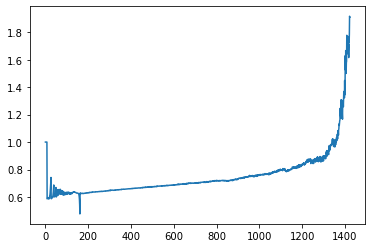

In [37]:
# n_timesteps=30
plt.plot(np.divide(mcg_old[0][mcg_new != 0], mcg_new[mcg_new != 0]))

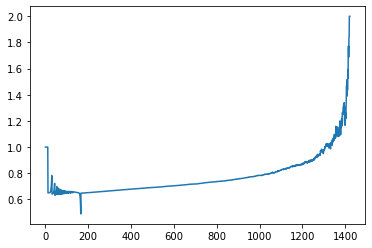

In [44]:
# n_timesteps=35
plt.plot(np.divide(mcg_old[0][mcg_new != 0], mcg_new[mcg_new != 0]))

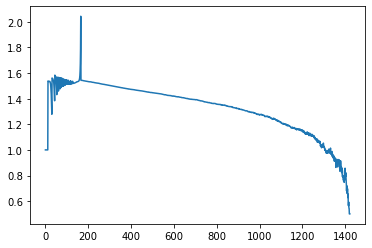

In [49]:
# n_timesteps=35
plt.plot(np.divide(mcg_new[mcg_old[0] != 0], mcg_old[0][mcg_old[0] != 0]))

In [67]:
np.array(list(sedgen_CA_NS_weathered.intra_cb_dict.keys()))
np.array(list(sedgen_CA_NS_weathered.intra_cb_dict.values()))

array([2997, 2996, 2995, 2994, 2993, 2992, 2991, 2990, 2989, 2988, 2987,
       2986, 2985, 2984, 2983, 2982, 2981, 2980, 2979, 2978, 2977, 2976,
       2975, 2974, 2973, 2972, 2971, 2970, 2969, 2968, 2967, 2966, 2965])

array([2811, 2844, 2863, 2876, 2886, 2894, 2901, 2907, 2912, 2917, 2921,
       2925, 2928, 2931, 2934, 2937, 2939, 2942, 2944, 2946, 2948, 2949,
       2951, 2953, 2954, 2956, 2957, 2958, 2959, 2961, 2962, 2963, 2964],
      dtype=int64)

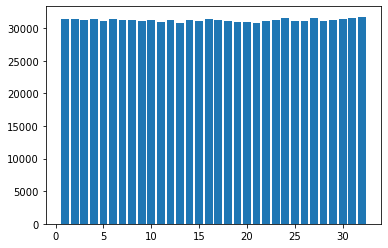

In [29]:
plt.bar(*np.unique(np.random.randint(low=1, high=len(intra_cb_breaks), size=1000000), return_counts=True))
plt.show();

In [52]:
%timeit breaker1 = np.random.randint(low=1, high=len(intra_cb_breaks), size=1000000)

5.39 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
%timeit breaker2 = np.tile(range(1, len(intra_cb_breaks)), int(1000000/(len(intra_cb_breaks) - 1)))

2.2 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [51]:
breaker2.size

1000000

In [44]:
breaker1.size

1000000

In [81]:
%timeit np.roll(breaker1, 1)

2.43 ms ± 67.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
